# Compare vaccination strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']

strategies = [
    ('equal', EPIDEMIC['ws_vacc'], 'Pop only'),
    ('no_vacc', EPIDEMIC['ws_vacc'], 'No vaccination'),
    ('thl', EPIDEMIC['ws_vacc'], 'Pop, Inf and Hosp'),
    ('thl', [1/2, 1/2, 0], 'Pop and Hosp'),
    ('thl', [1/2, 0, 1/2], 'Pop and Inf'),
    ('thl', [0, 1/2, 1/2], 'Hosp and Inf'),
    ('thl', [0, 1, 0], 'Hosp only'),
    ('thl', [0, 0, 1], 'Inf only'),
]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=True,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0)

rho: 42.30093403973104
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Pop only. 1/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Pop and Hosp. 4/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Pop and Inf. 5/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Hosp and Inf. 6/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Hosp only. 7/8
Finished R: 1.0. Beta: 0.02364013993309823 1/4. Policy: Inf only. 8/8
Finished R: 1.25. Beta: 0.02955017491637279 2/4. Policy: Pop only. 1/8
Finished R: 1.25. Beta: 0.02955017491637279 2/4. Policy: No vaccination. 2/8
Finished R: 1.25. Beta: 0.02955017491637279 2/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.25. Beta: 0.02955017491637279 2/4. Policy: Pop and Hosp. 4/8
Finished R: 1.25. Beta: 0.02955017491637279 2/4. Policy: Pop and Inf. 5/8
Finished R: 1

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop and Inf: 85.3397923785098
Pop, Inf and Hosp: 85.34570064033801
Pop and Hosp: 85.37069435477368
Inf only: 85.40189247875632
Hosp and Inf: 85.41004052889062
Hosp only: 85.43792872007492
Pop only: 85.52561317234634


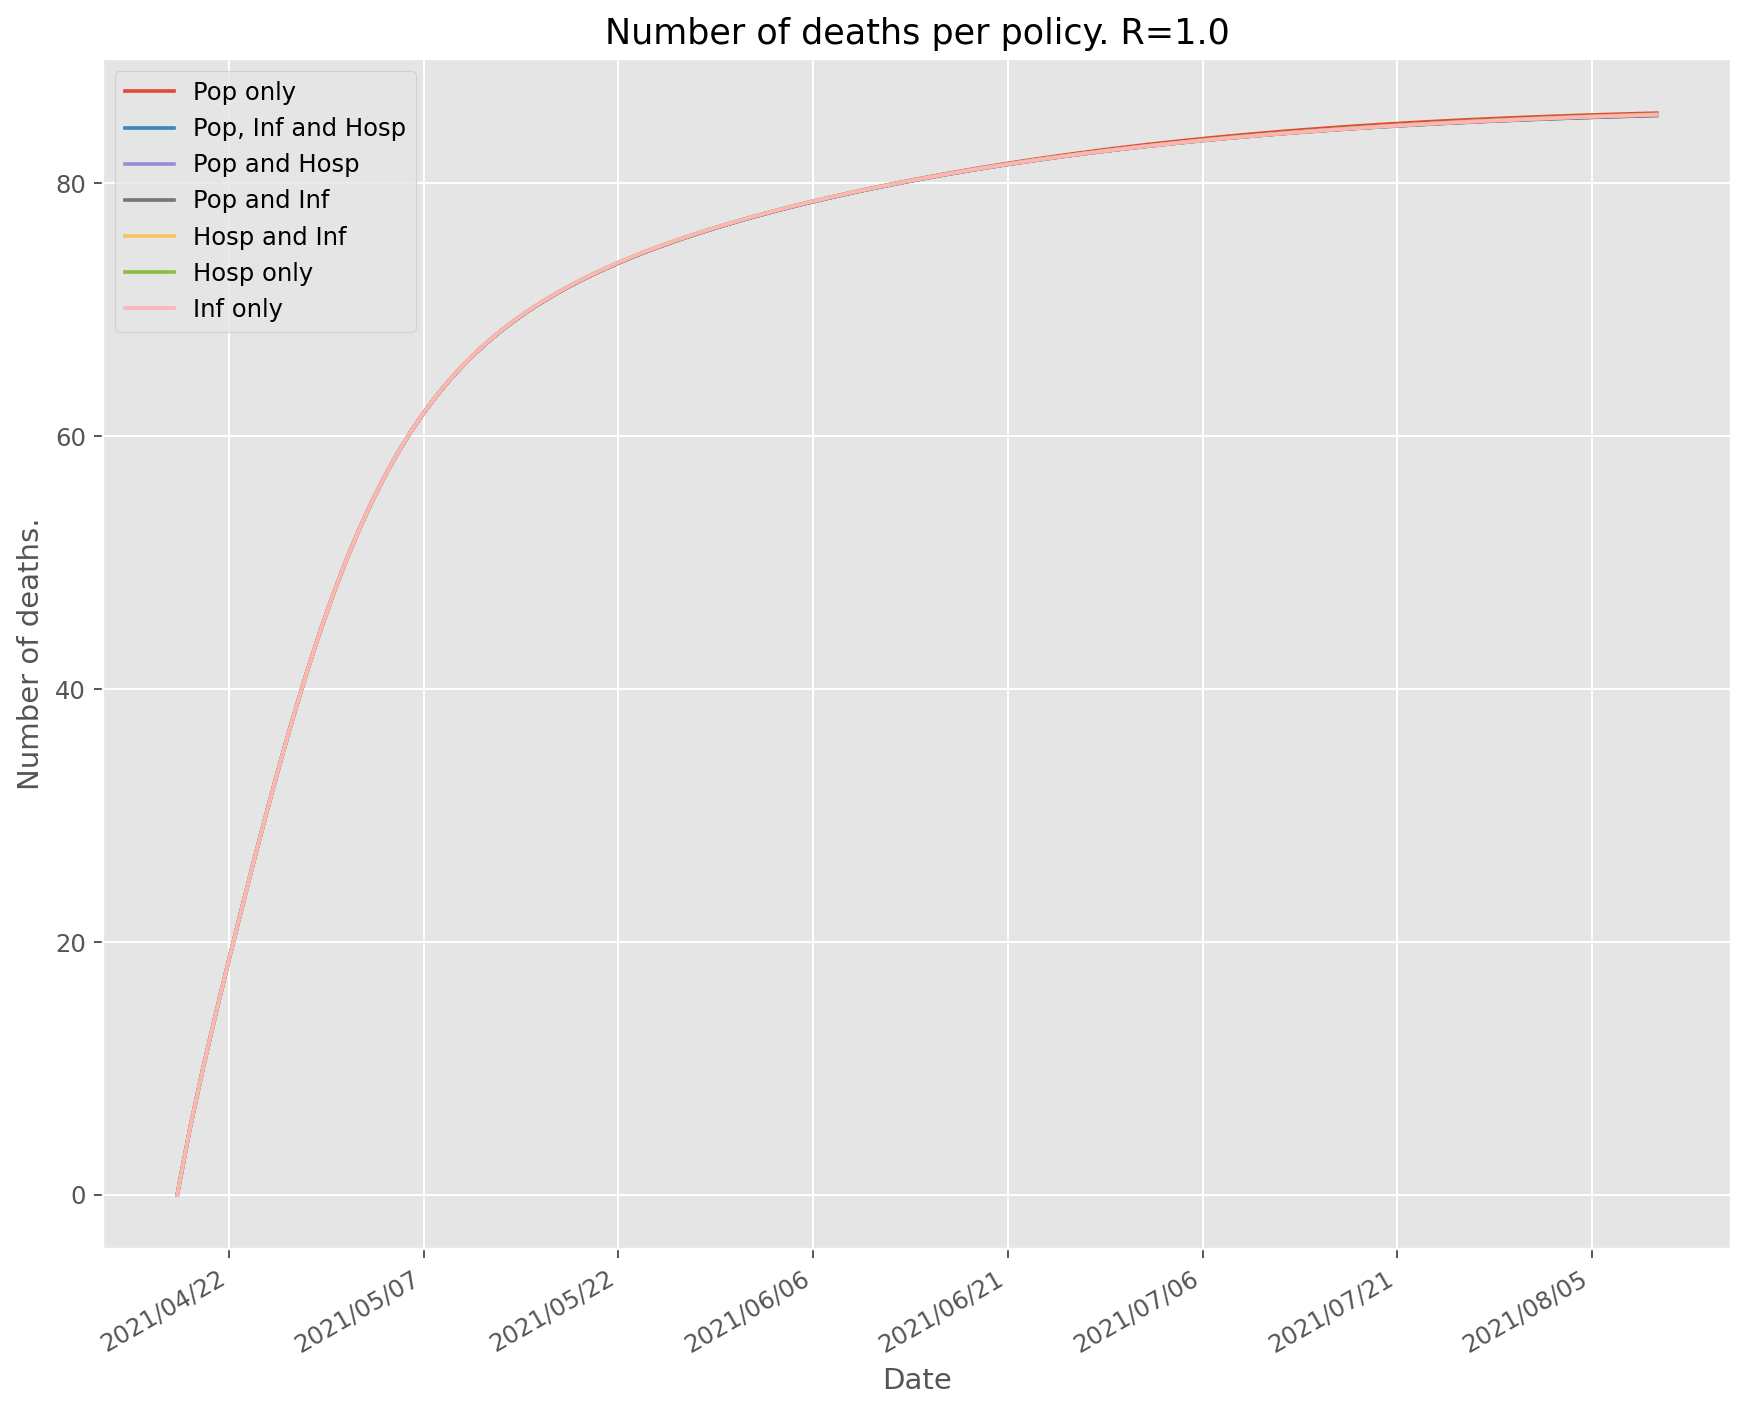

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 136.01501746250423
Pop and Hosp: 136.22285629558363
Pop, Inf and Hosp: 136.3854902491952
Pop only: 136.41629103922148
Inf only: 137.25896978715312
Hosp and Inf: 137.36452810863835
Hosp only: 137.53883818831895


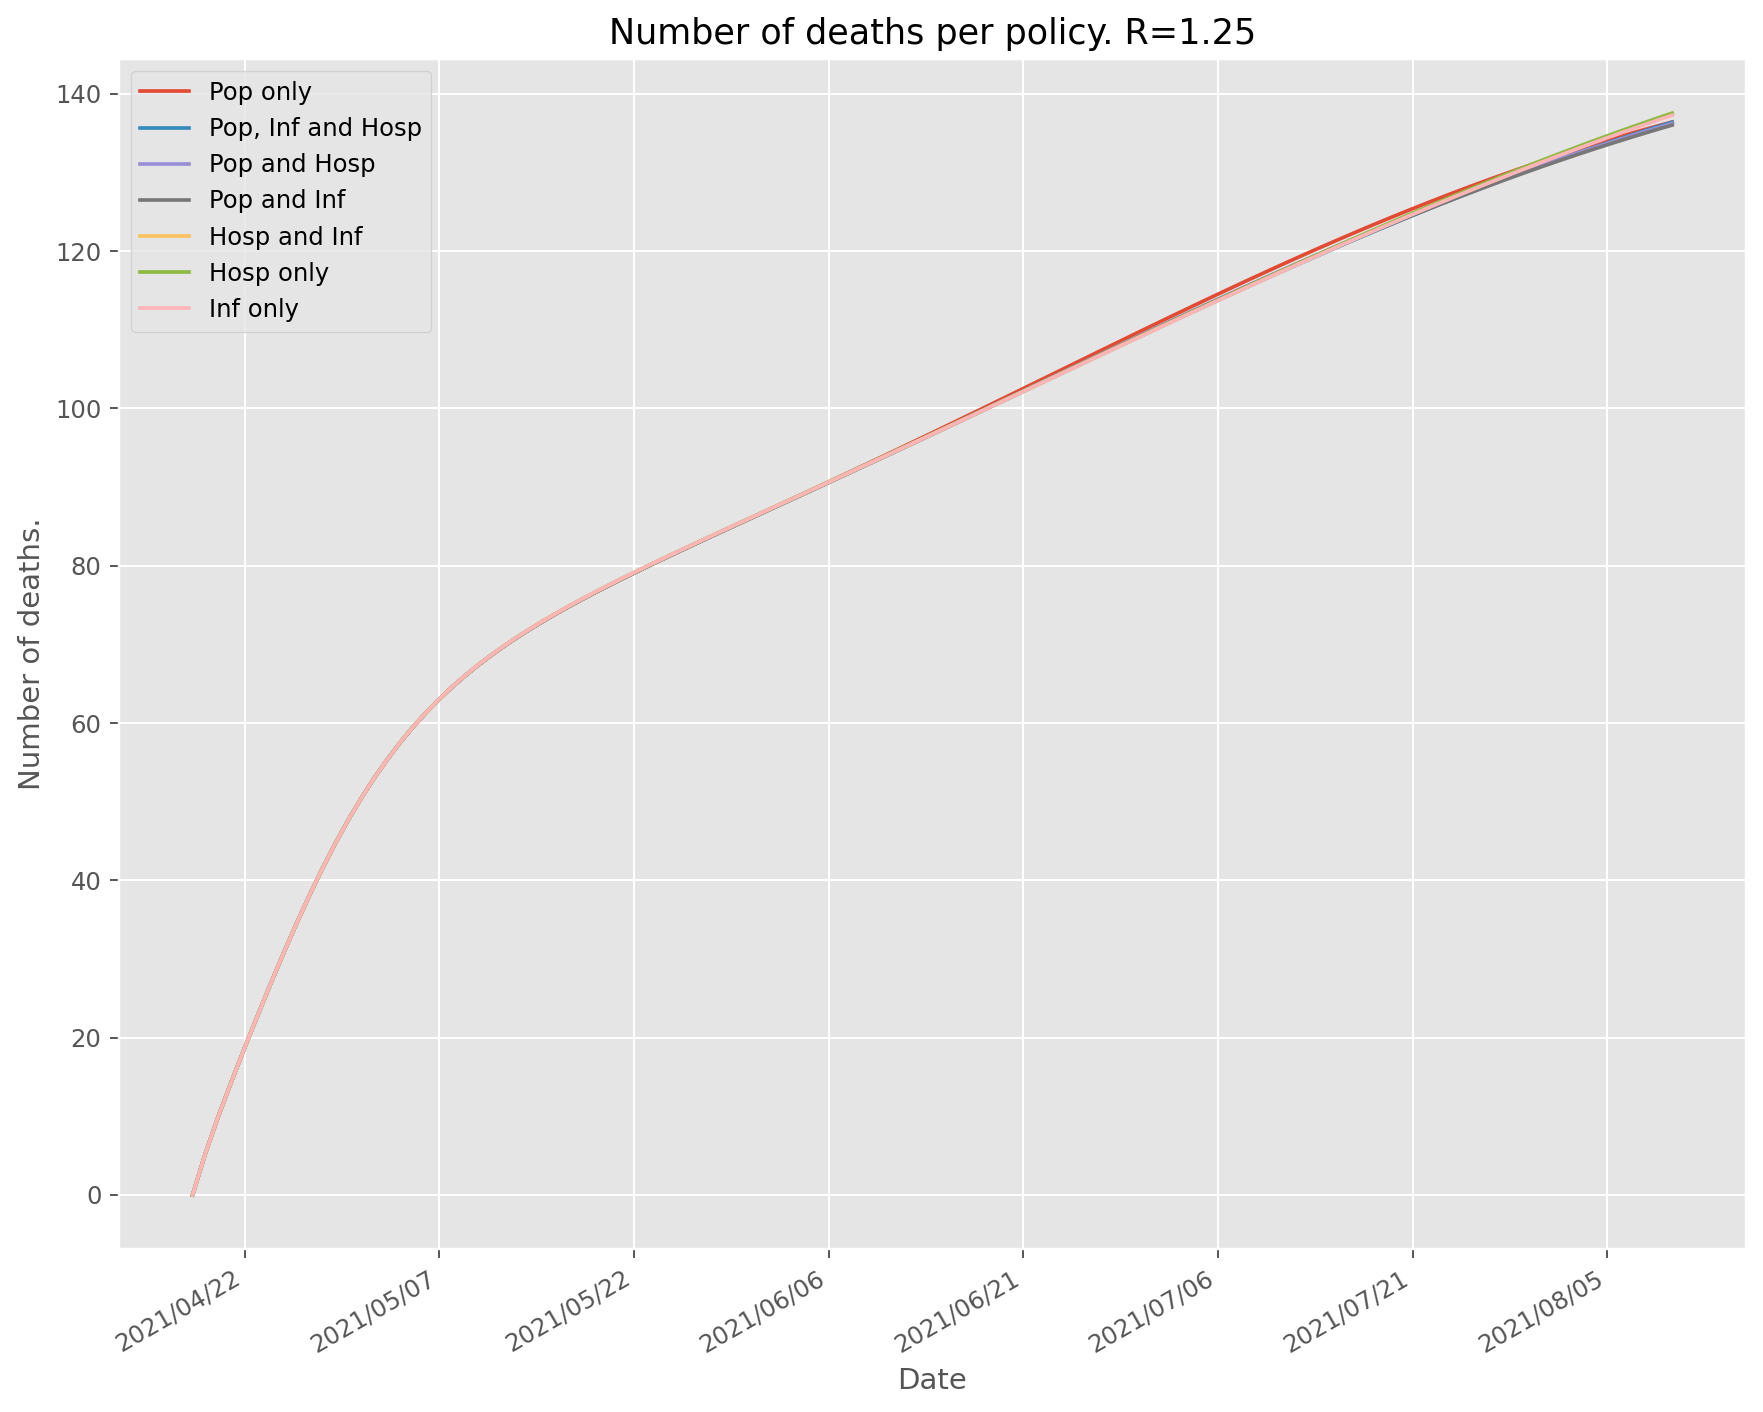

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 332.4564856351491
Pop and Inf: 338.0679416033961
Pop and Hosp: 339.0527077745378
Pop, Inf and Hosp: 342.0270616062678
Inf only: 350.0808264156195
Hosp and Inf: 350.43980593753383
Hosp only: 351.0800610464871


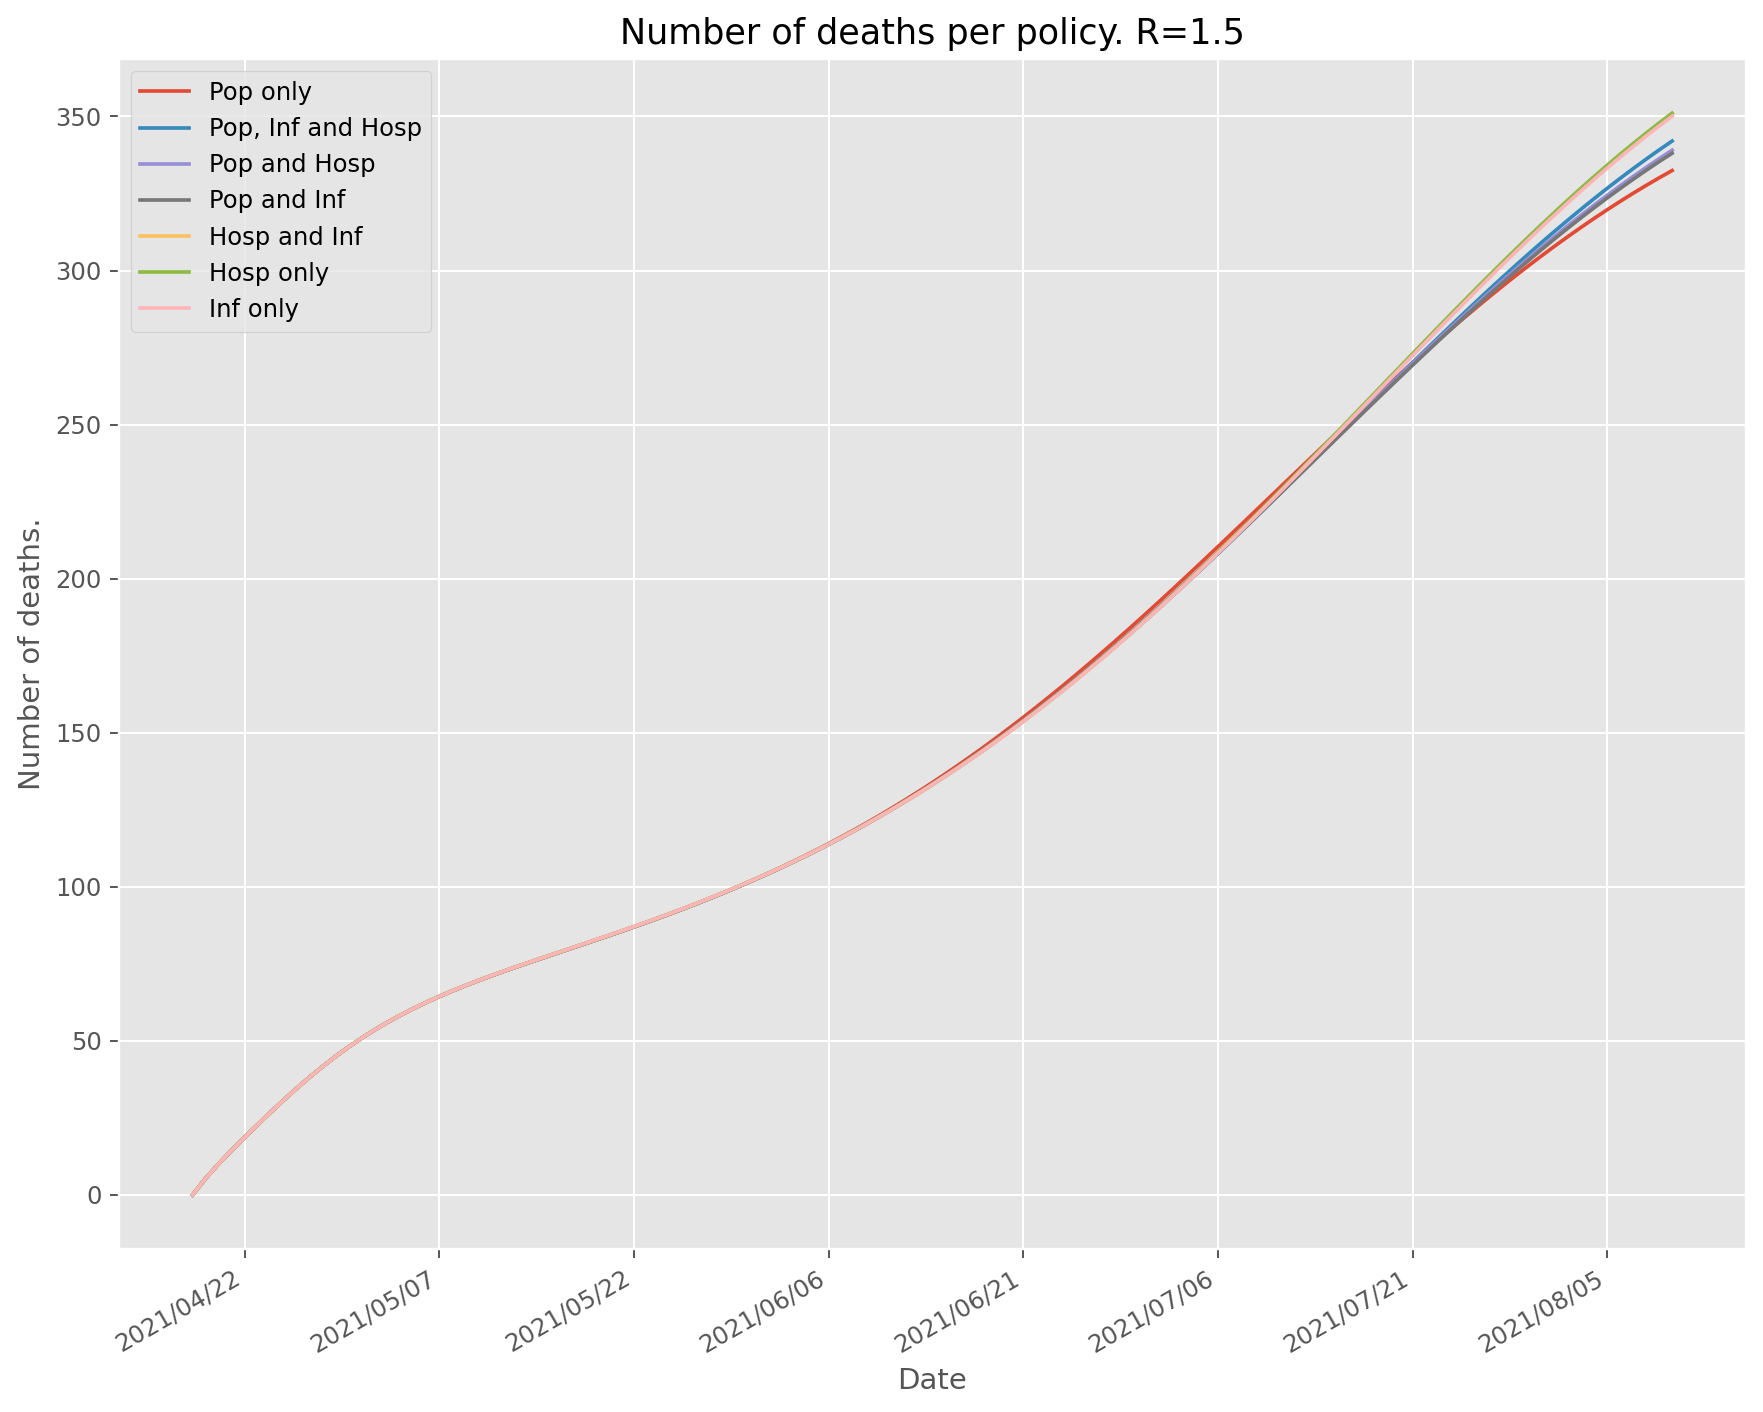

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1166.3220234313042
Pop and Inf: 1197.8746777962128
Pop and Hosp: 1200.2815214282502
Pop, Inf and Hosp: 1211.7405663040377
Hosp and Inf: 1244.5258177122578
Inf only: 1244.7279516676824
Hosp only: 1245.0951102487131


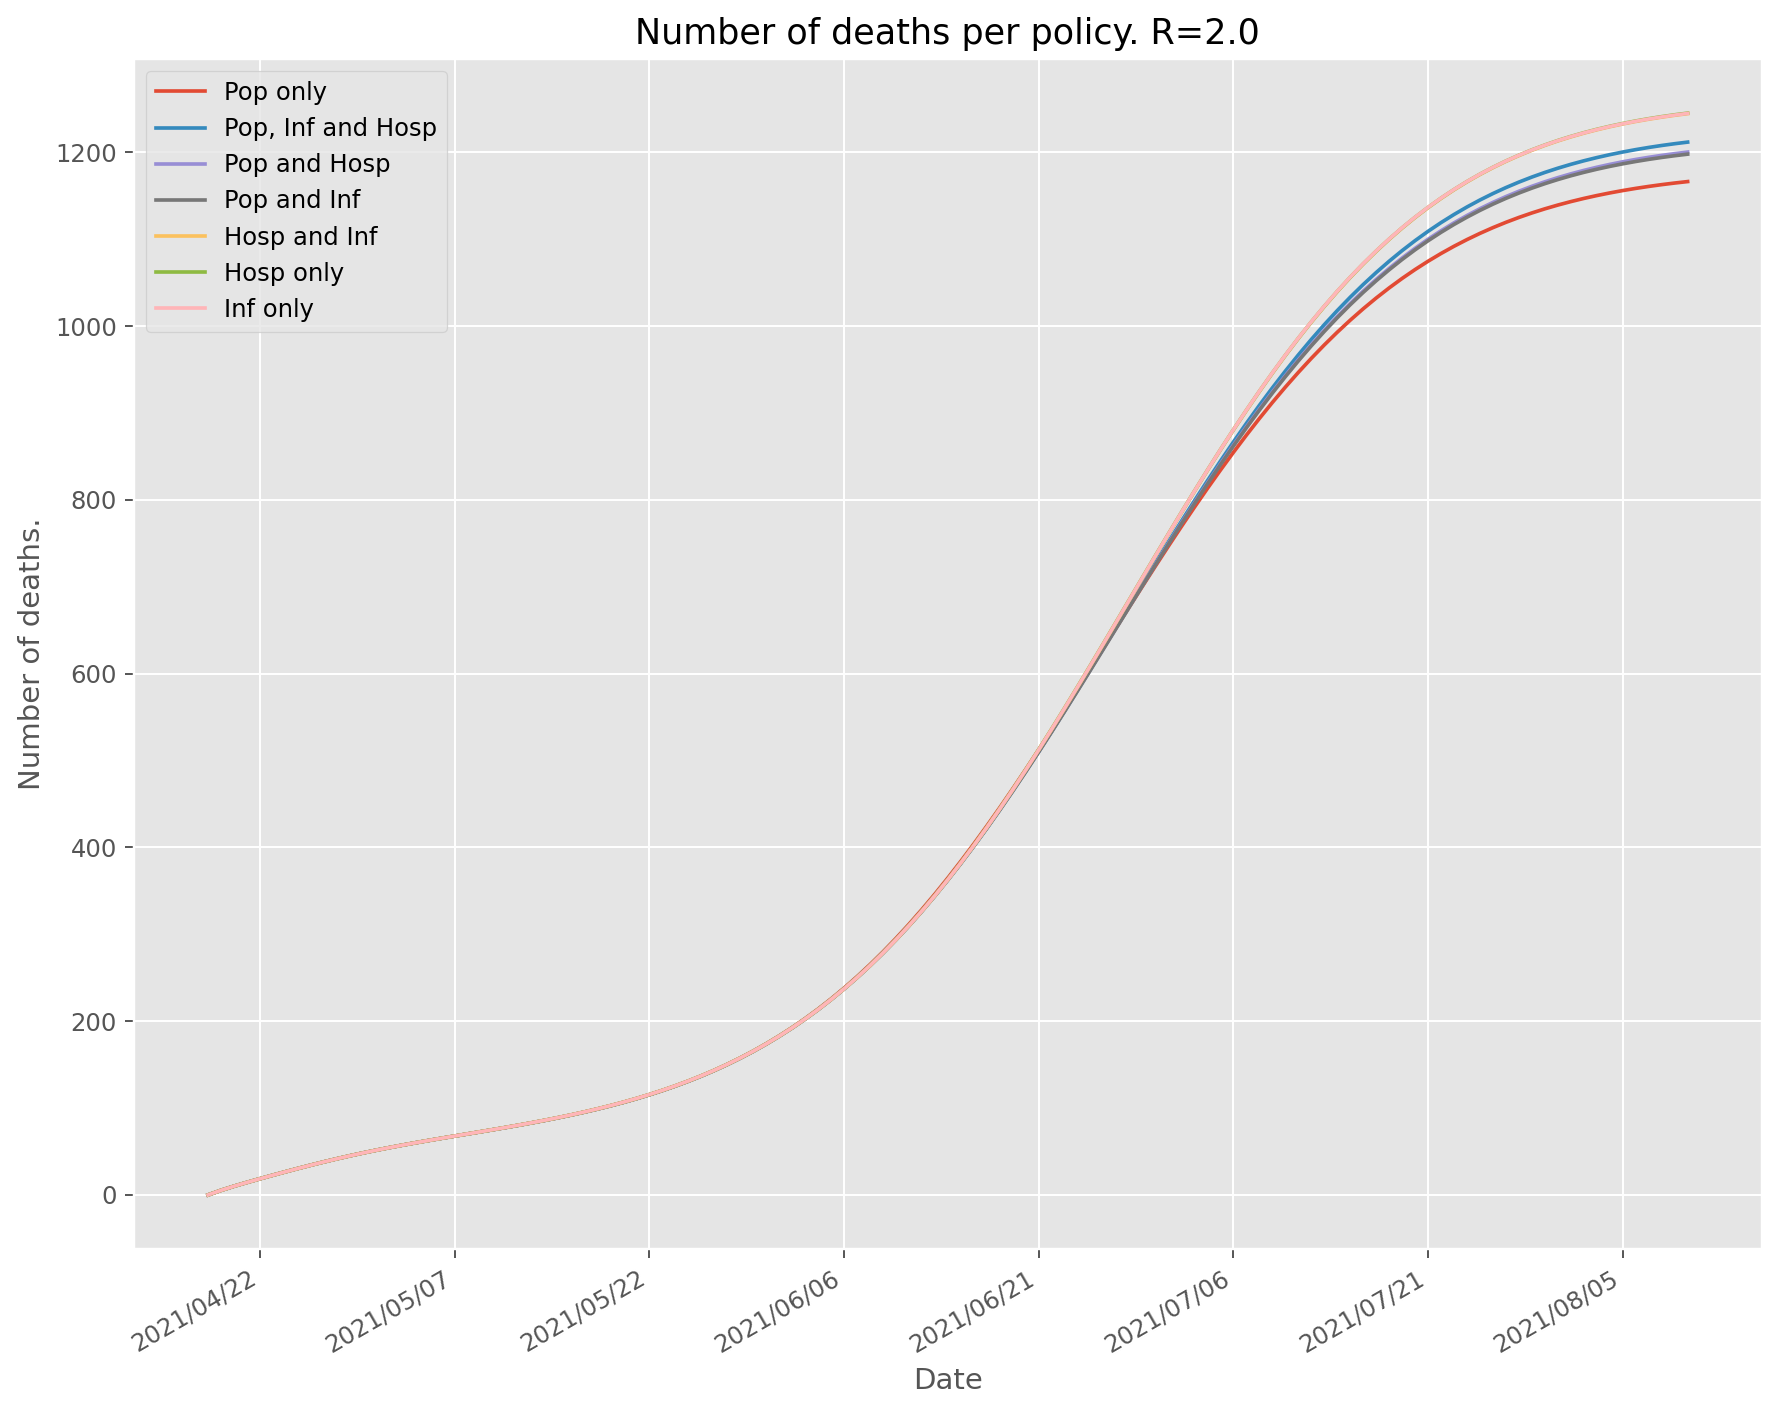

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop and Inf: 85.3397923785098
Pop, Inf and Hosp: 85.34570064033797
Pop and Hosp: 85.37069435477369
Inf only: 85.40189247875634
Hosp and Inf: 85.41004052889063
Hosp only: 85.43792872007494
Pop only: 85.52561317234634


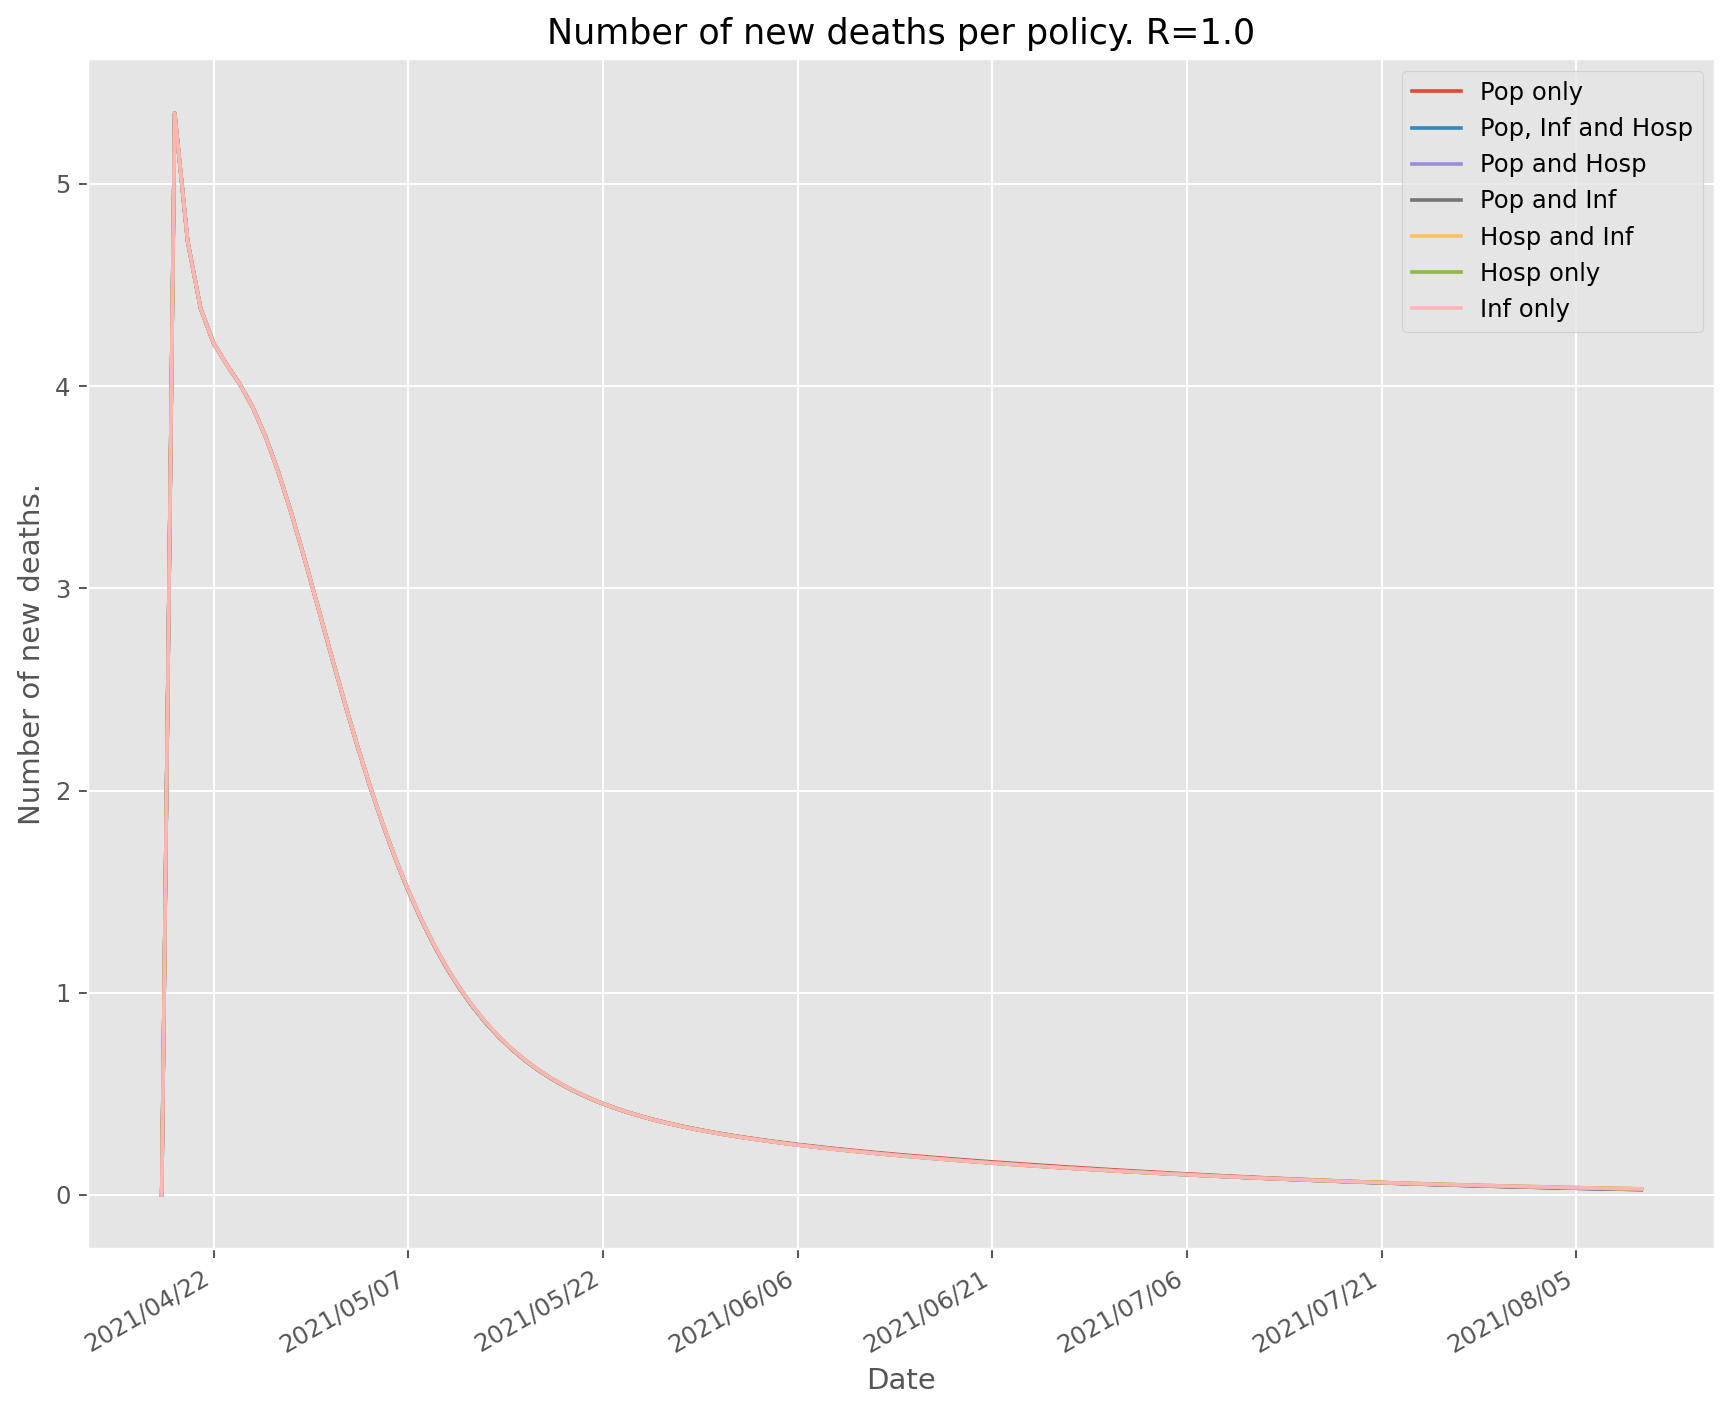

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 136.0150174625042
Pop and Hosp: 136.22285629558363
Pop, Inf and Hosp: 136.38549024919521
Pop only: 136.4162910392215
Inf only: 137.25896978715306
Hosp and Inf: 137.36452810863835
Hosp only: 137.53883818831895


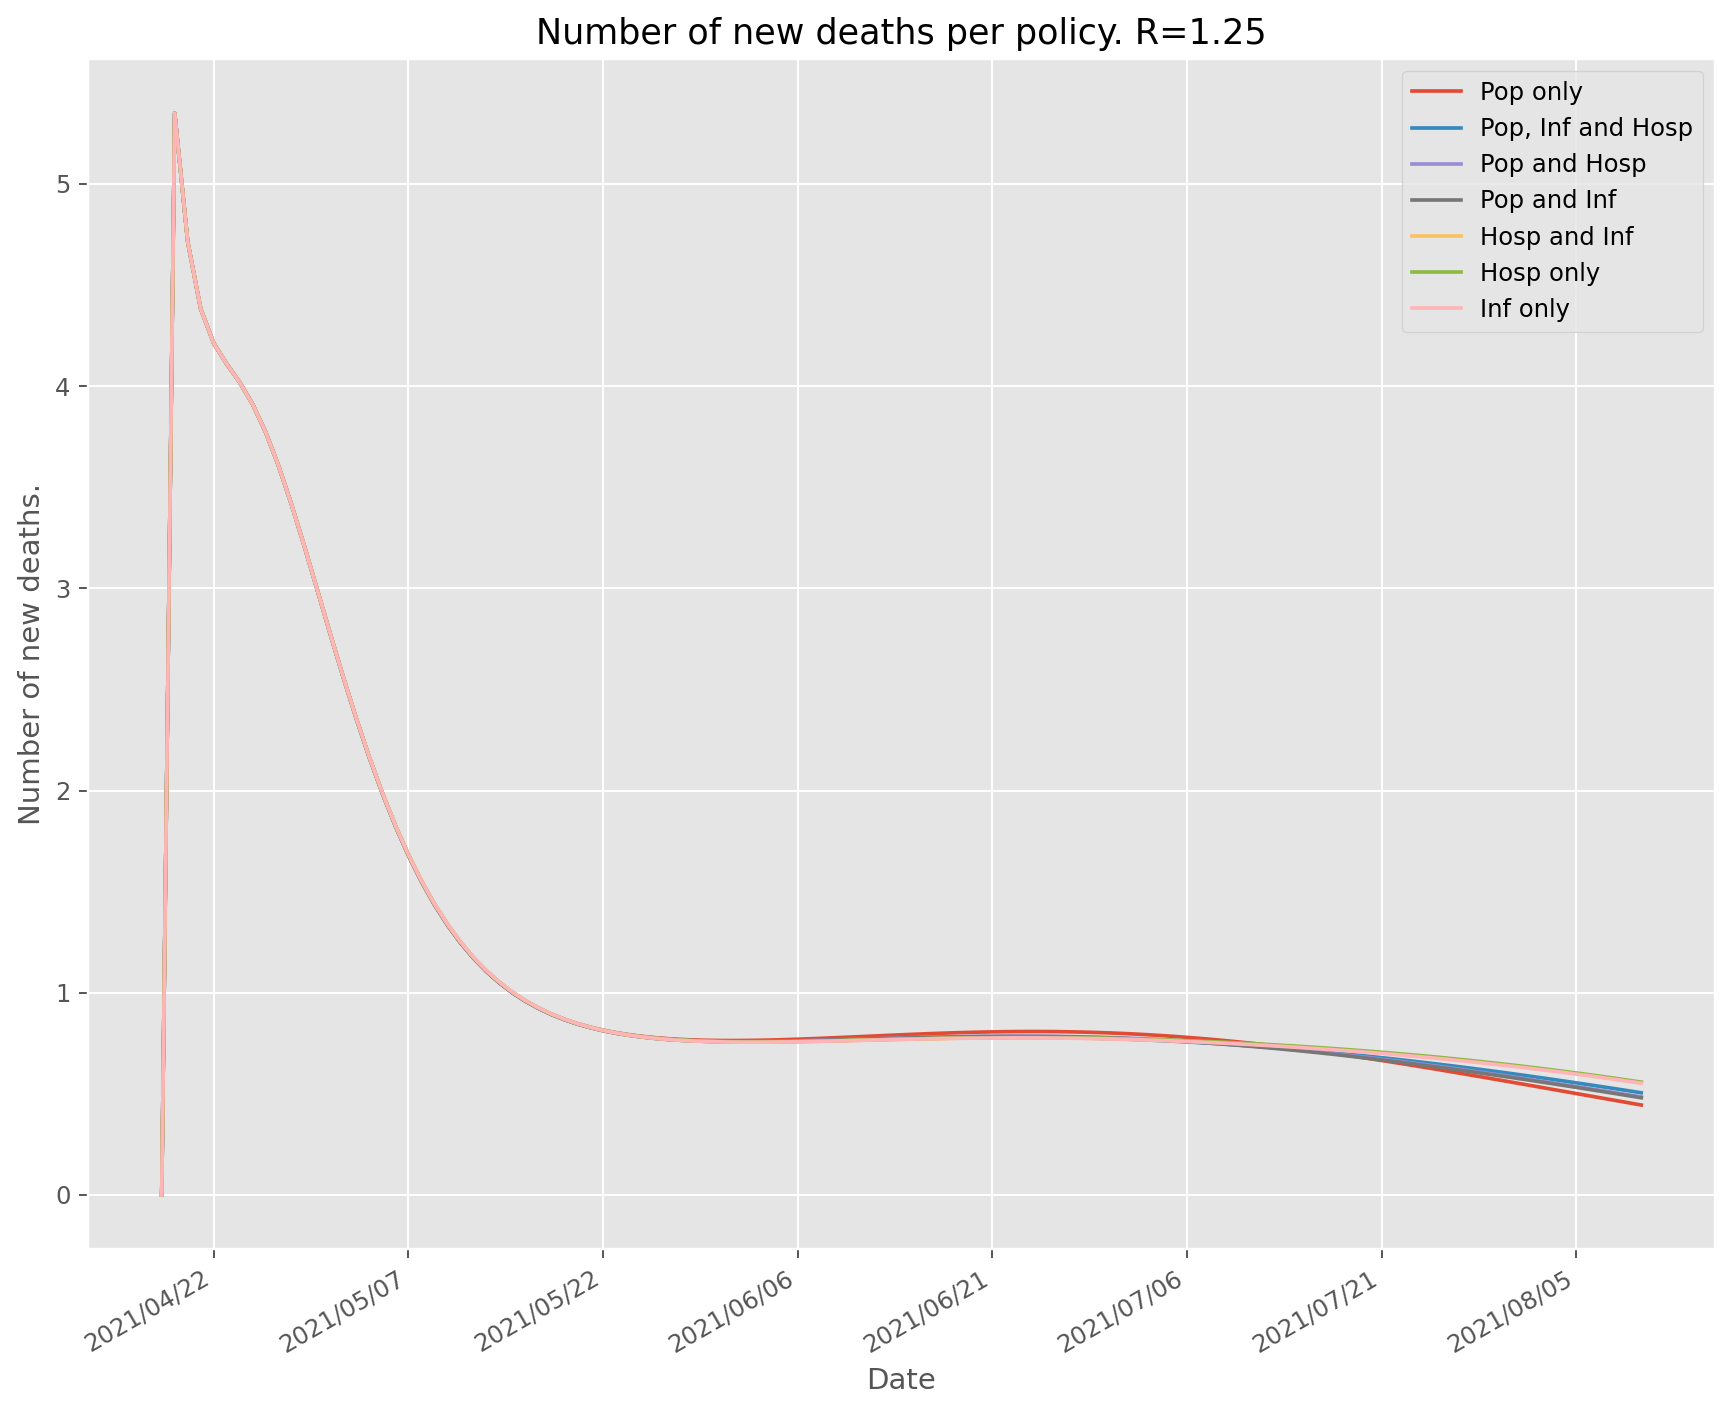

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 332.45648563514914
Pop and Inf: 338.06794160339604
Pop and Hosp: 339.0527077745378
Pop, Inf and Hosp: 342.0270616062678
Inf only: 350.0808264156195
Hosp and Inf: 350.4398059375338
Hosp only: 351.08006104648706


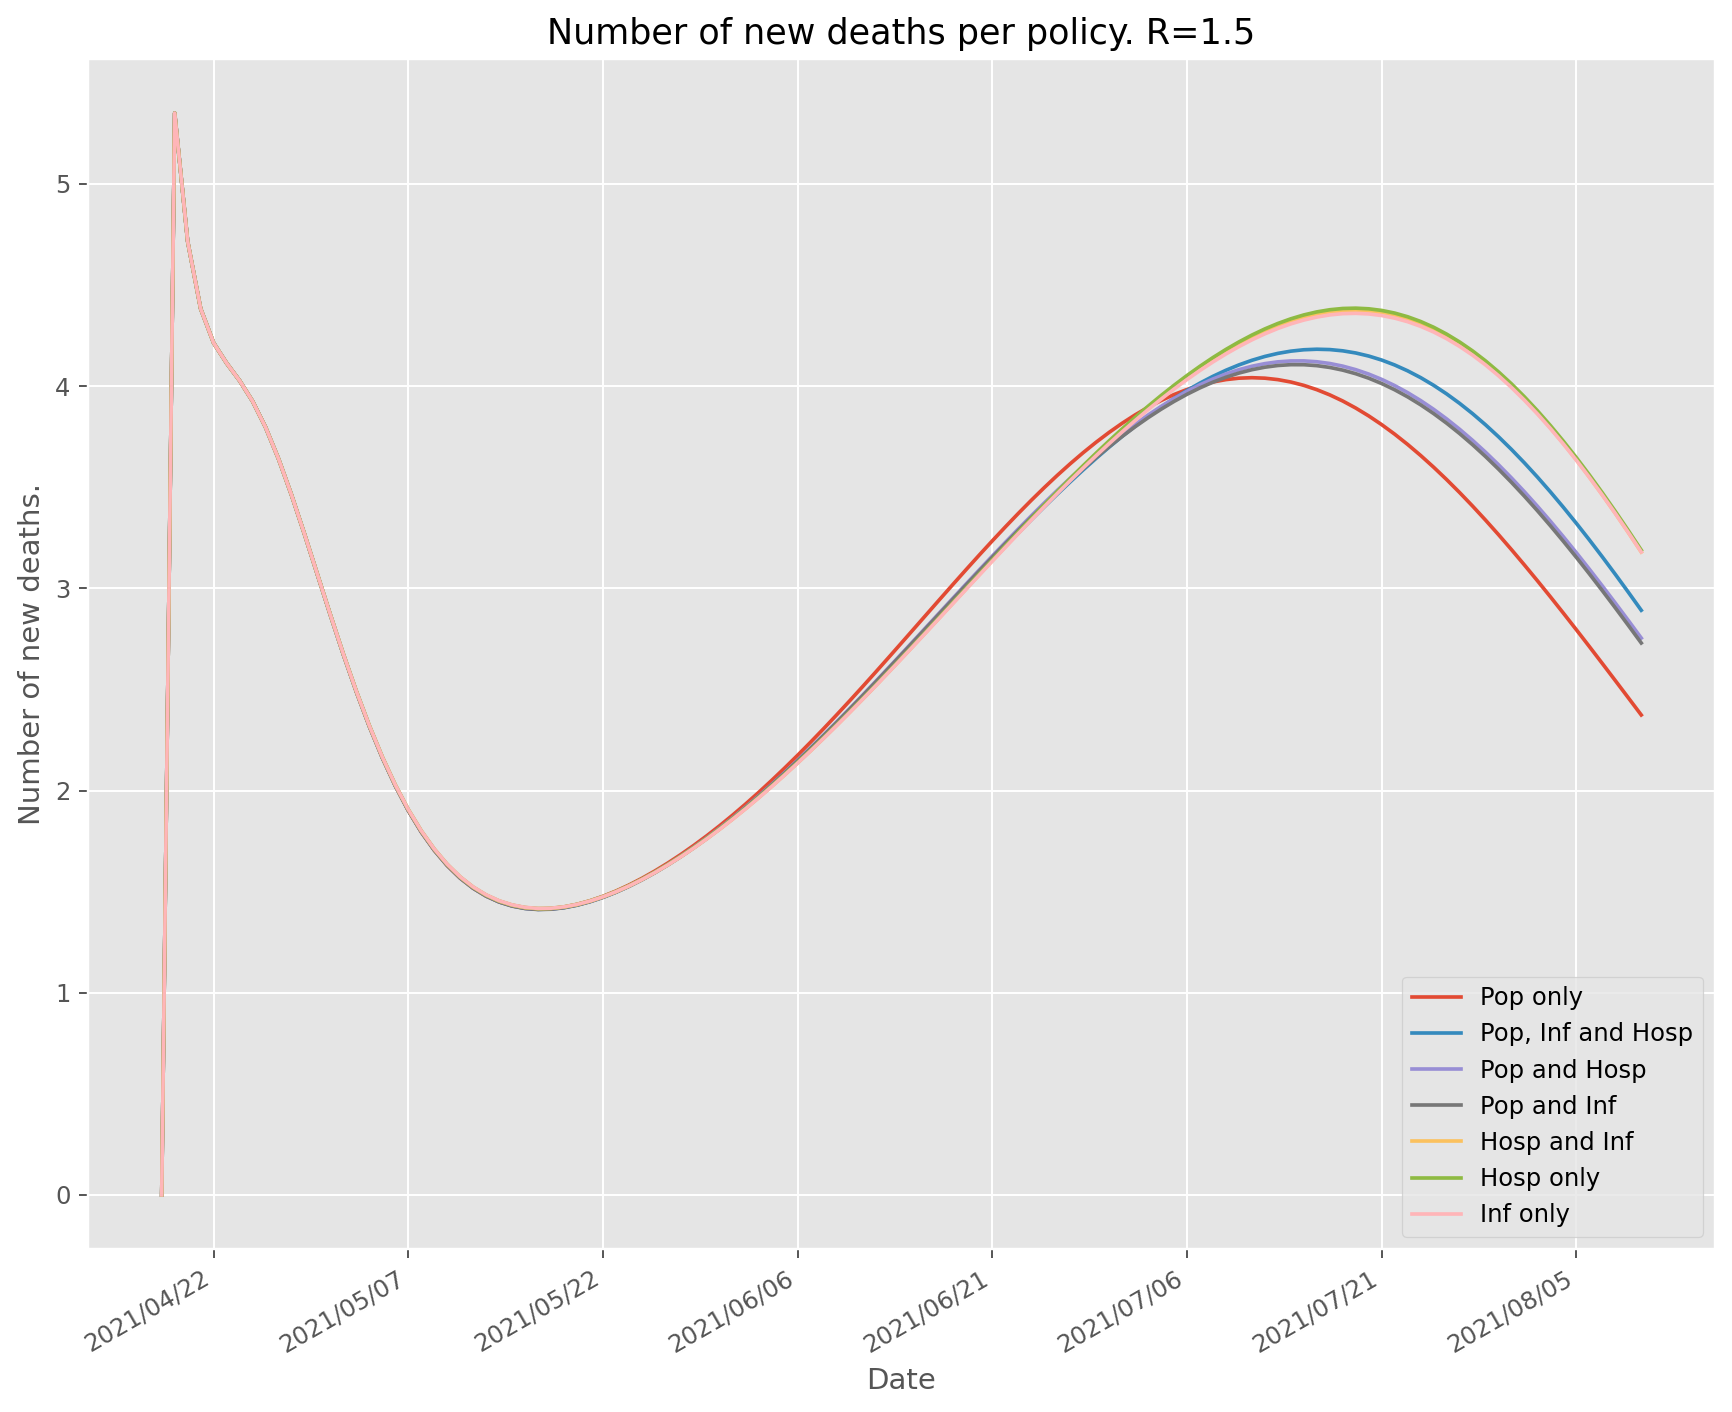

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1166.3220234313042
Pop and Inf: 1197.874677796213
Pop and Hosp: 1200.2815214282505
Pop, Inf and Hosp: 1211.7405663040374
Hosp and Inf: 1244.5258177122575
Inf only: 1244.7279516676826
Hosp only: 1245.0951102487131


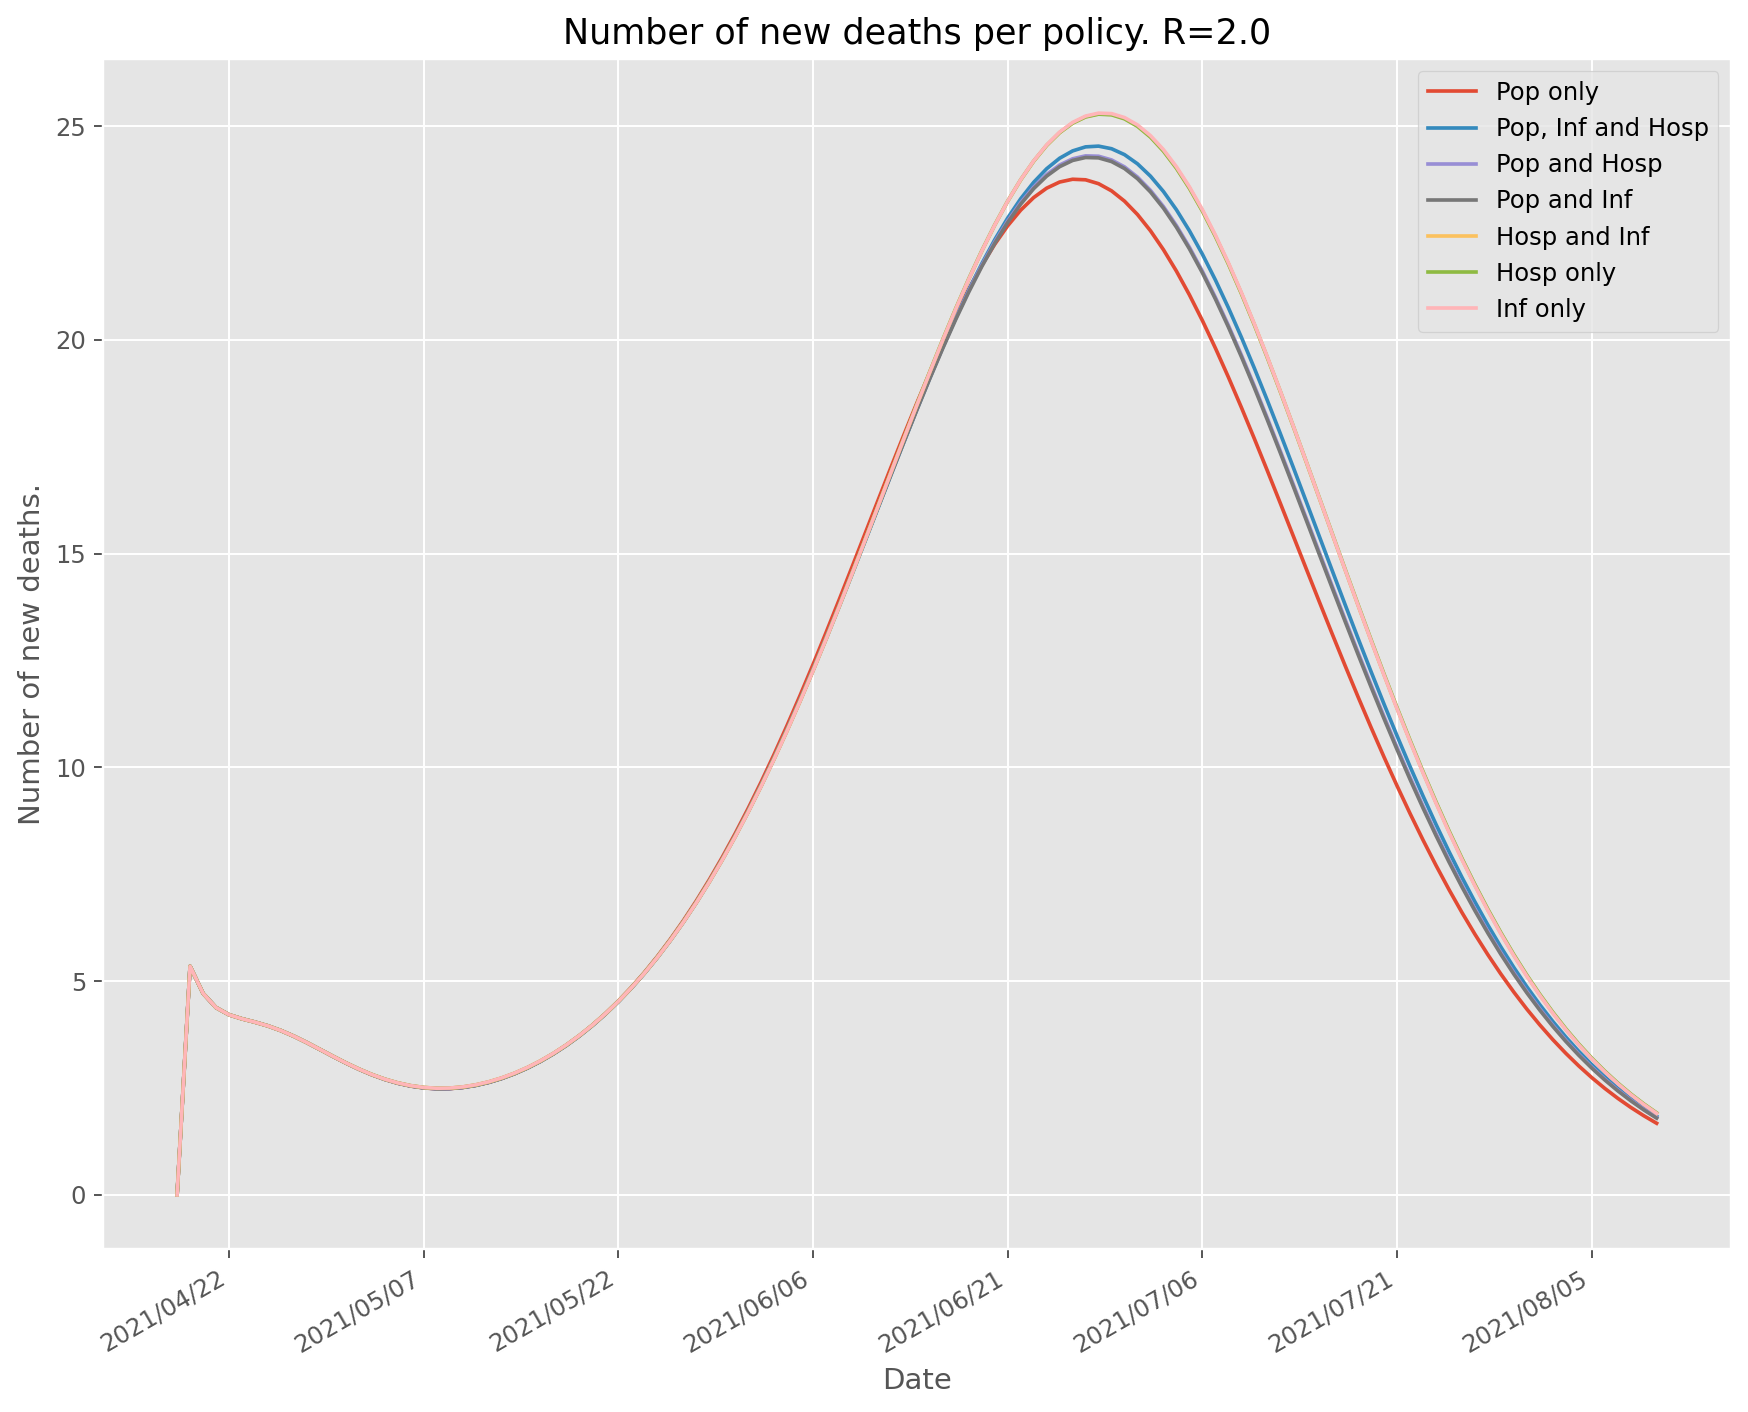

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 8070.833411443265
Hosp and Inf: 8079.868539969274
Hosp only: 8090.823328068102
Pop, Inf and Hosp: 8111.033097107453
Pop and Inf: 8136.817745218239
Pop and Hosp: 8145.111690823046
Pop only: 8306.996601626533


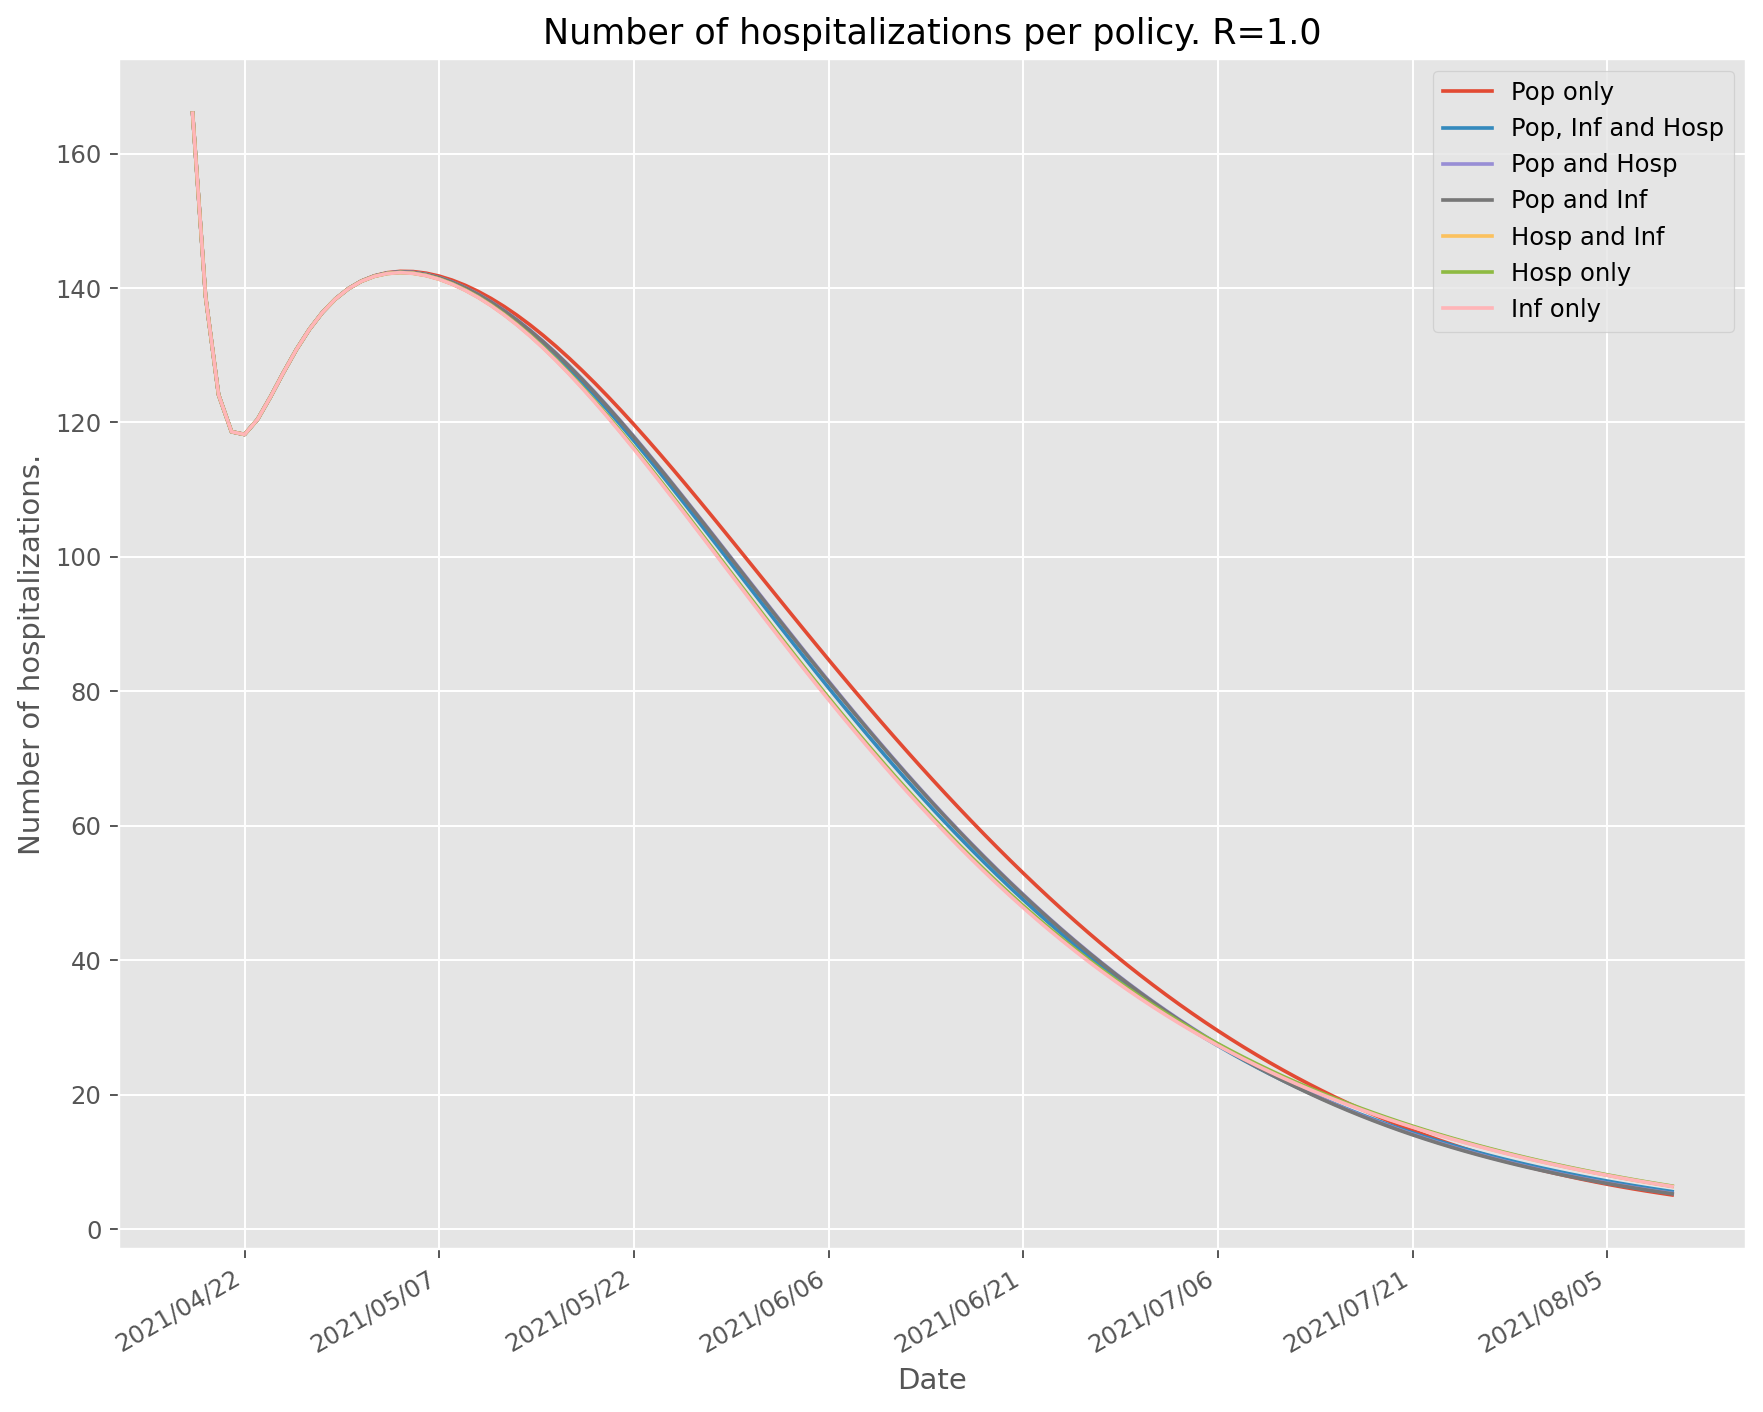

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 23454.520661356695
Pop and Hosp: 23517.66080988674
Pop, Inf and Hosp: 23530.050566867365
Inf only: 23796.135195506497
Hosp and Inf: 23840.585974417325
Hosp only: 23906.160338157853
Pop only: 24029.55014073118


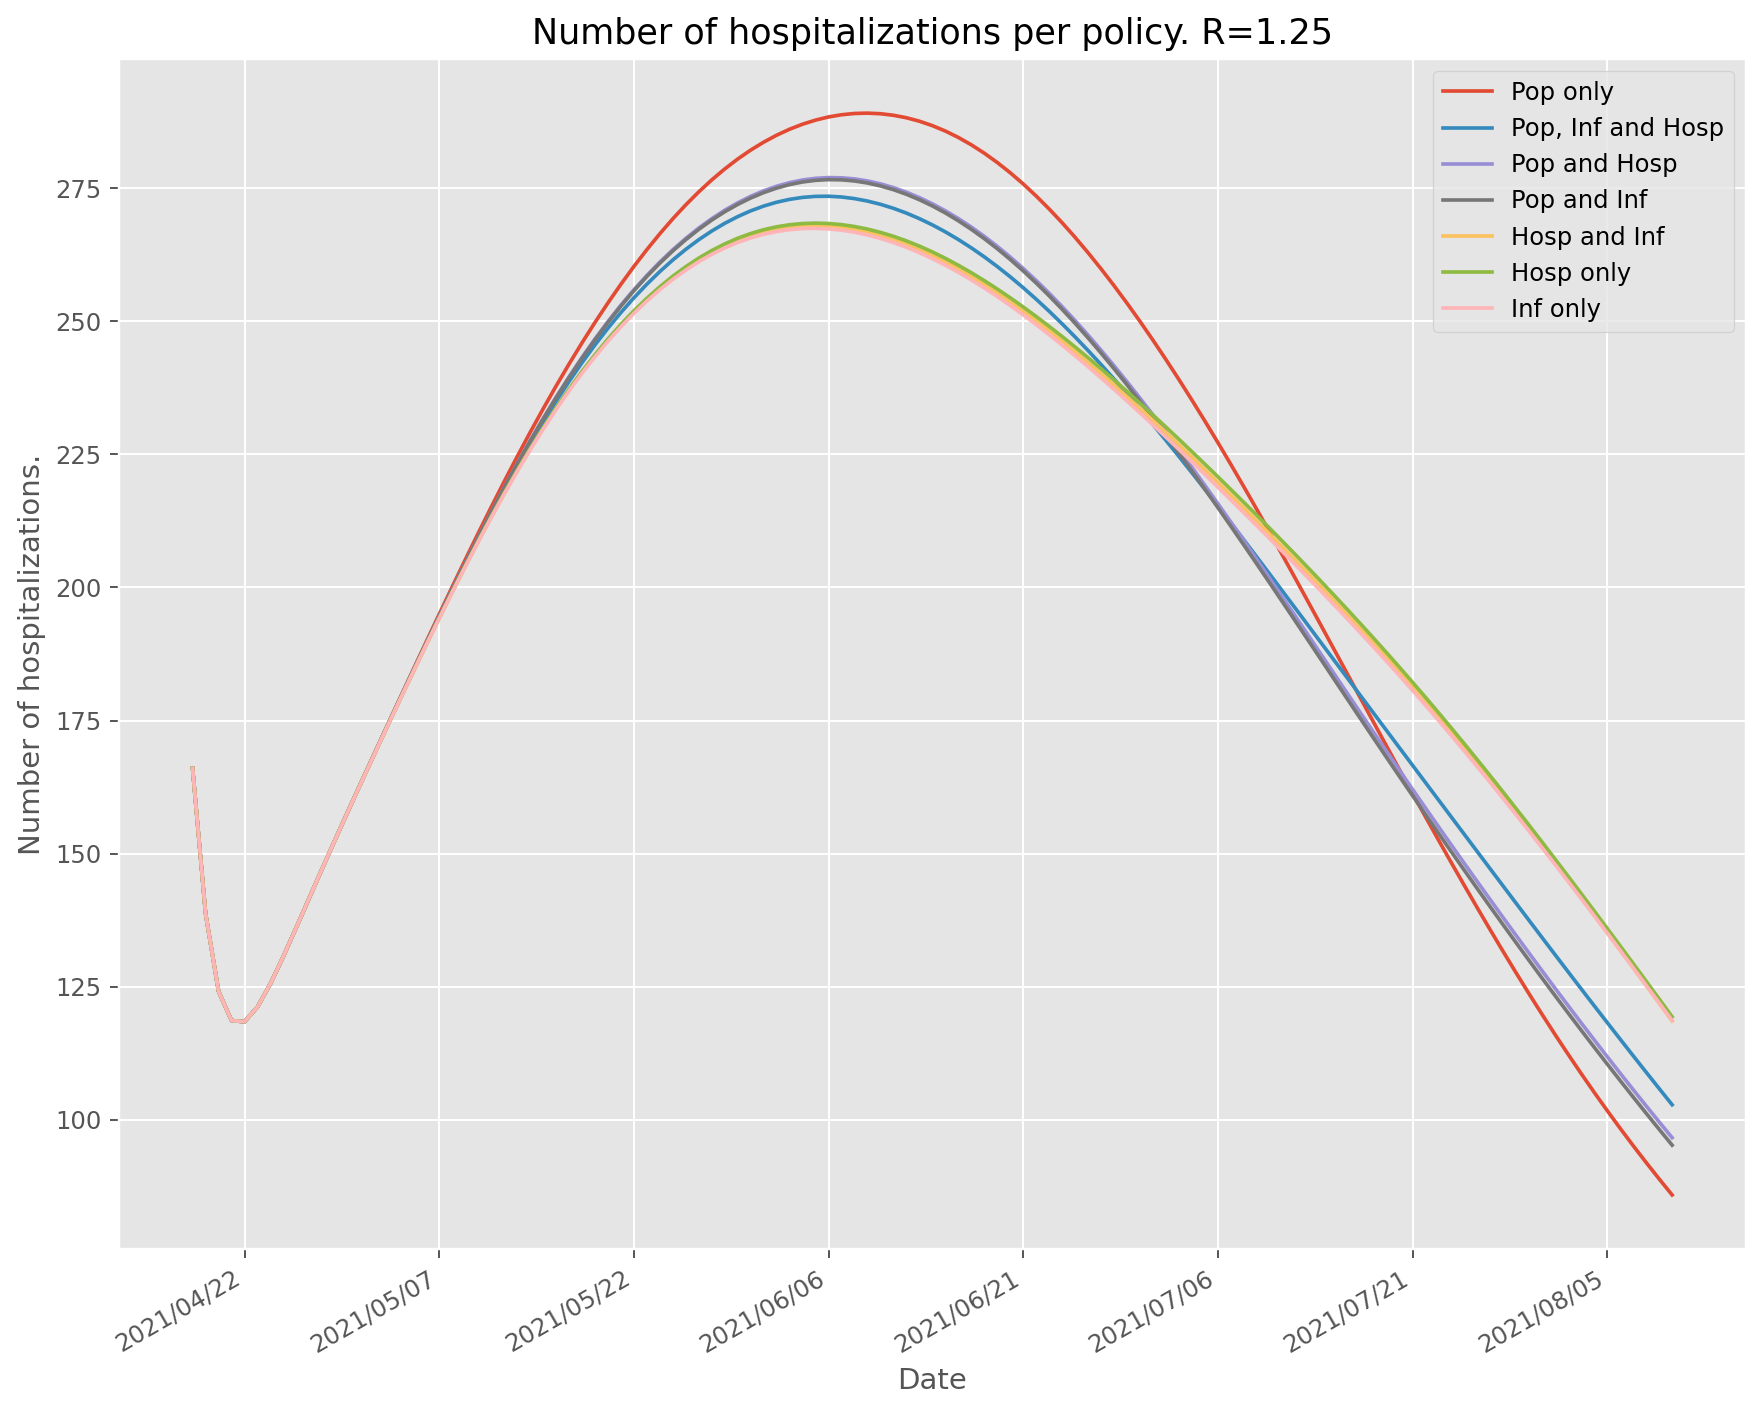

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 77723.77261282268
Pop and Inf: 78122.08794306678
Pop and Hosp: 78425.95482296581
Pop, Inf and Hosp: 79330.91948596227
Inf only: 82162.2317824702
Hosp and Inf: 82274.83475852289
Hosp only: 82508.85337680775


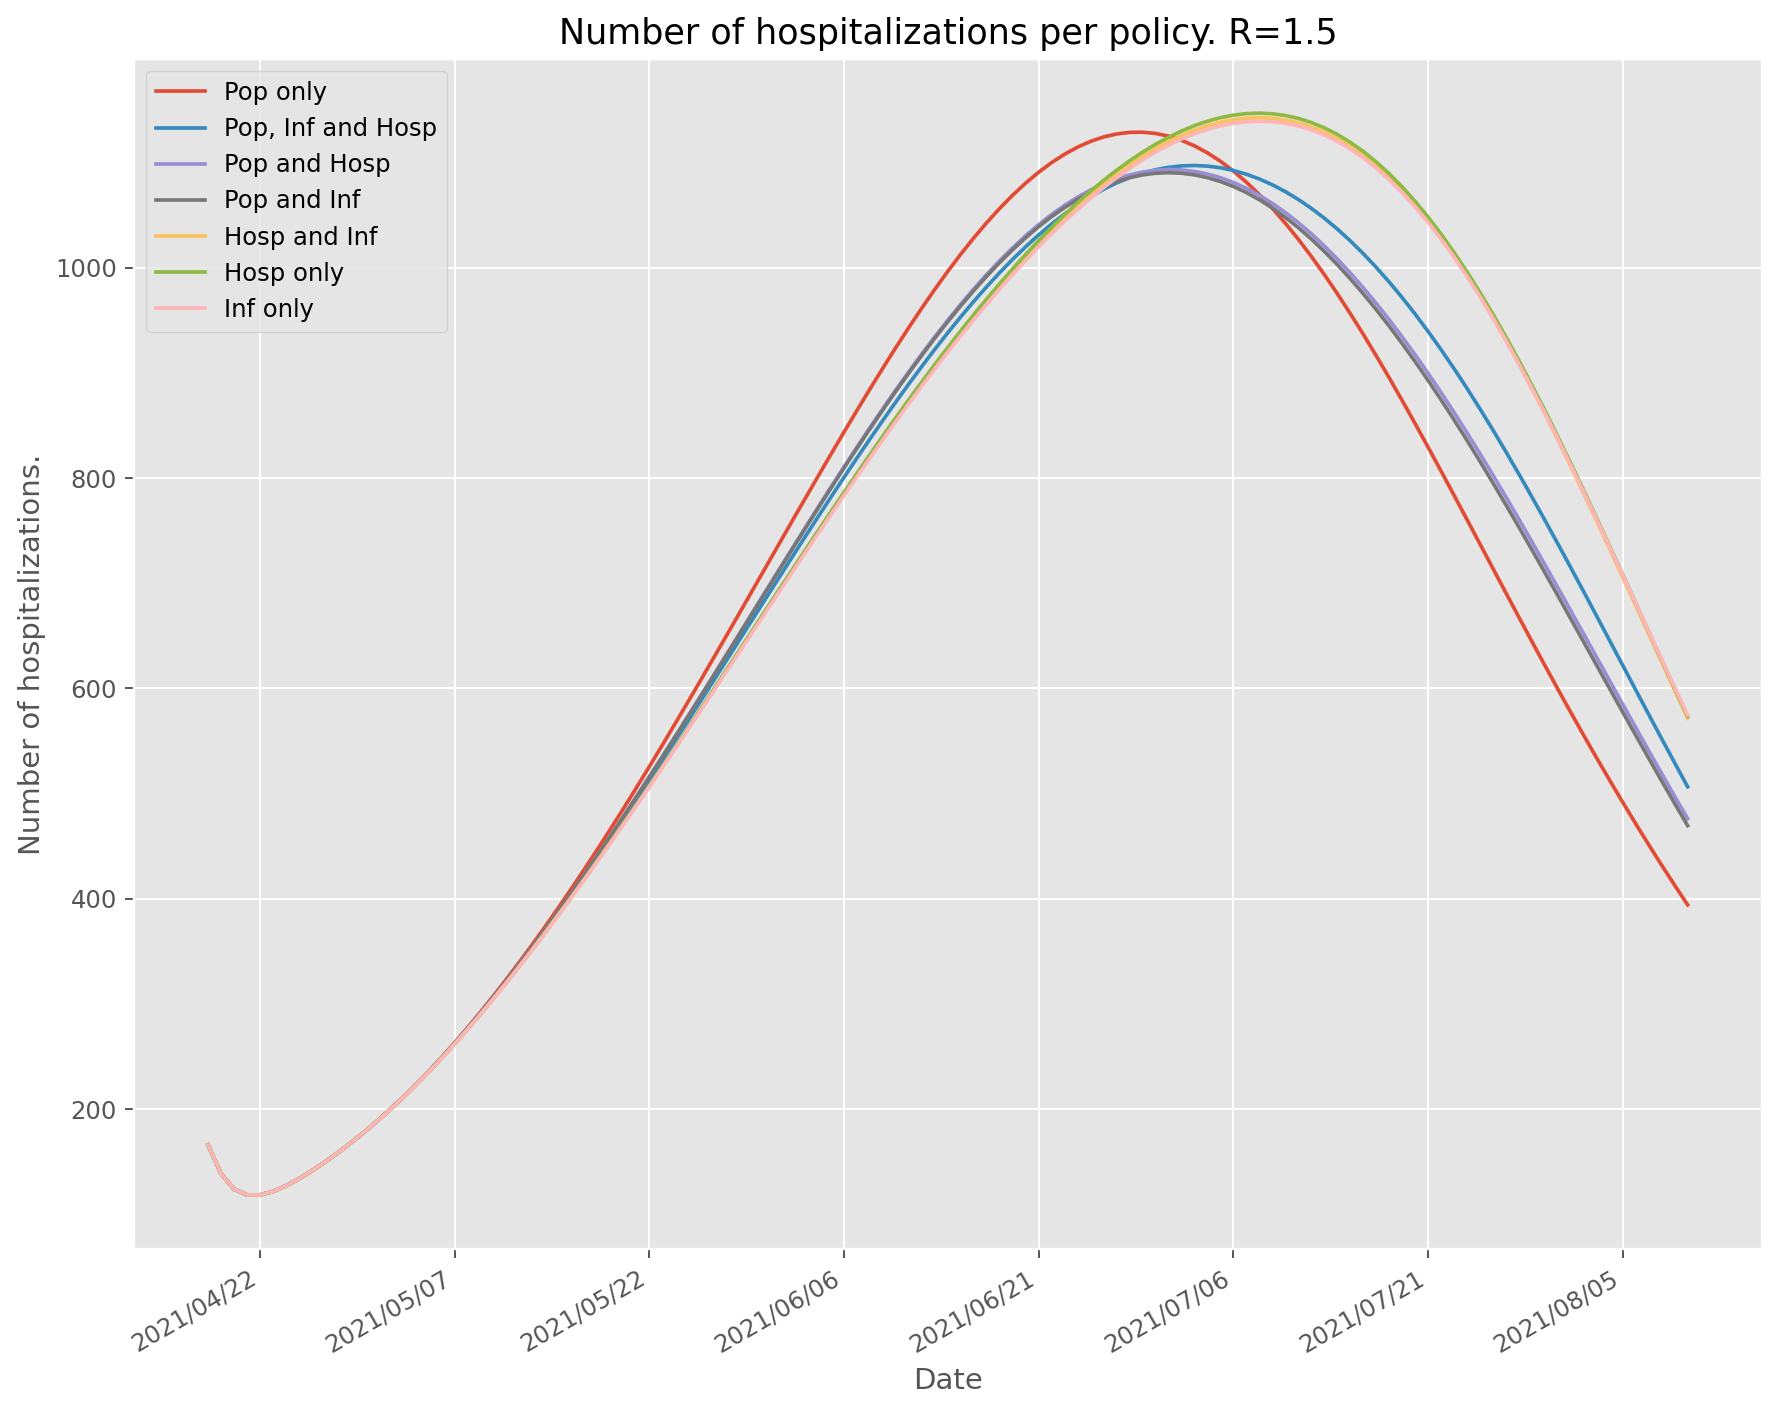

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 266962.53668277554
Pop and Inf: 272806.08103239664
Pop and Hosp: 273432.6713570941
Pop, Inf and Hosp: 276467.14074078575
Inf only: 284681.8133397195
Hosp and Inf: 285044.99720887904
Hosp only: 285593.1708449891


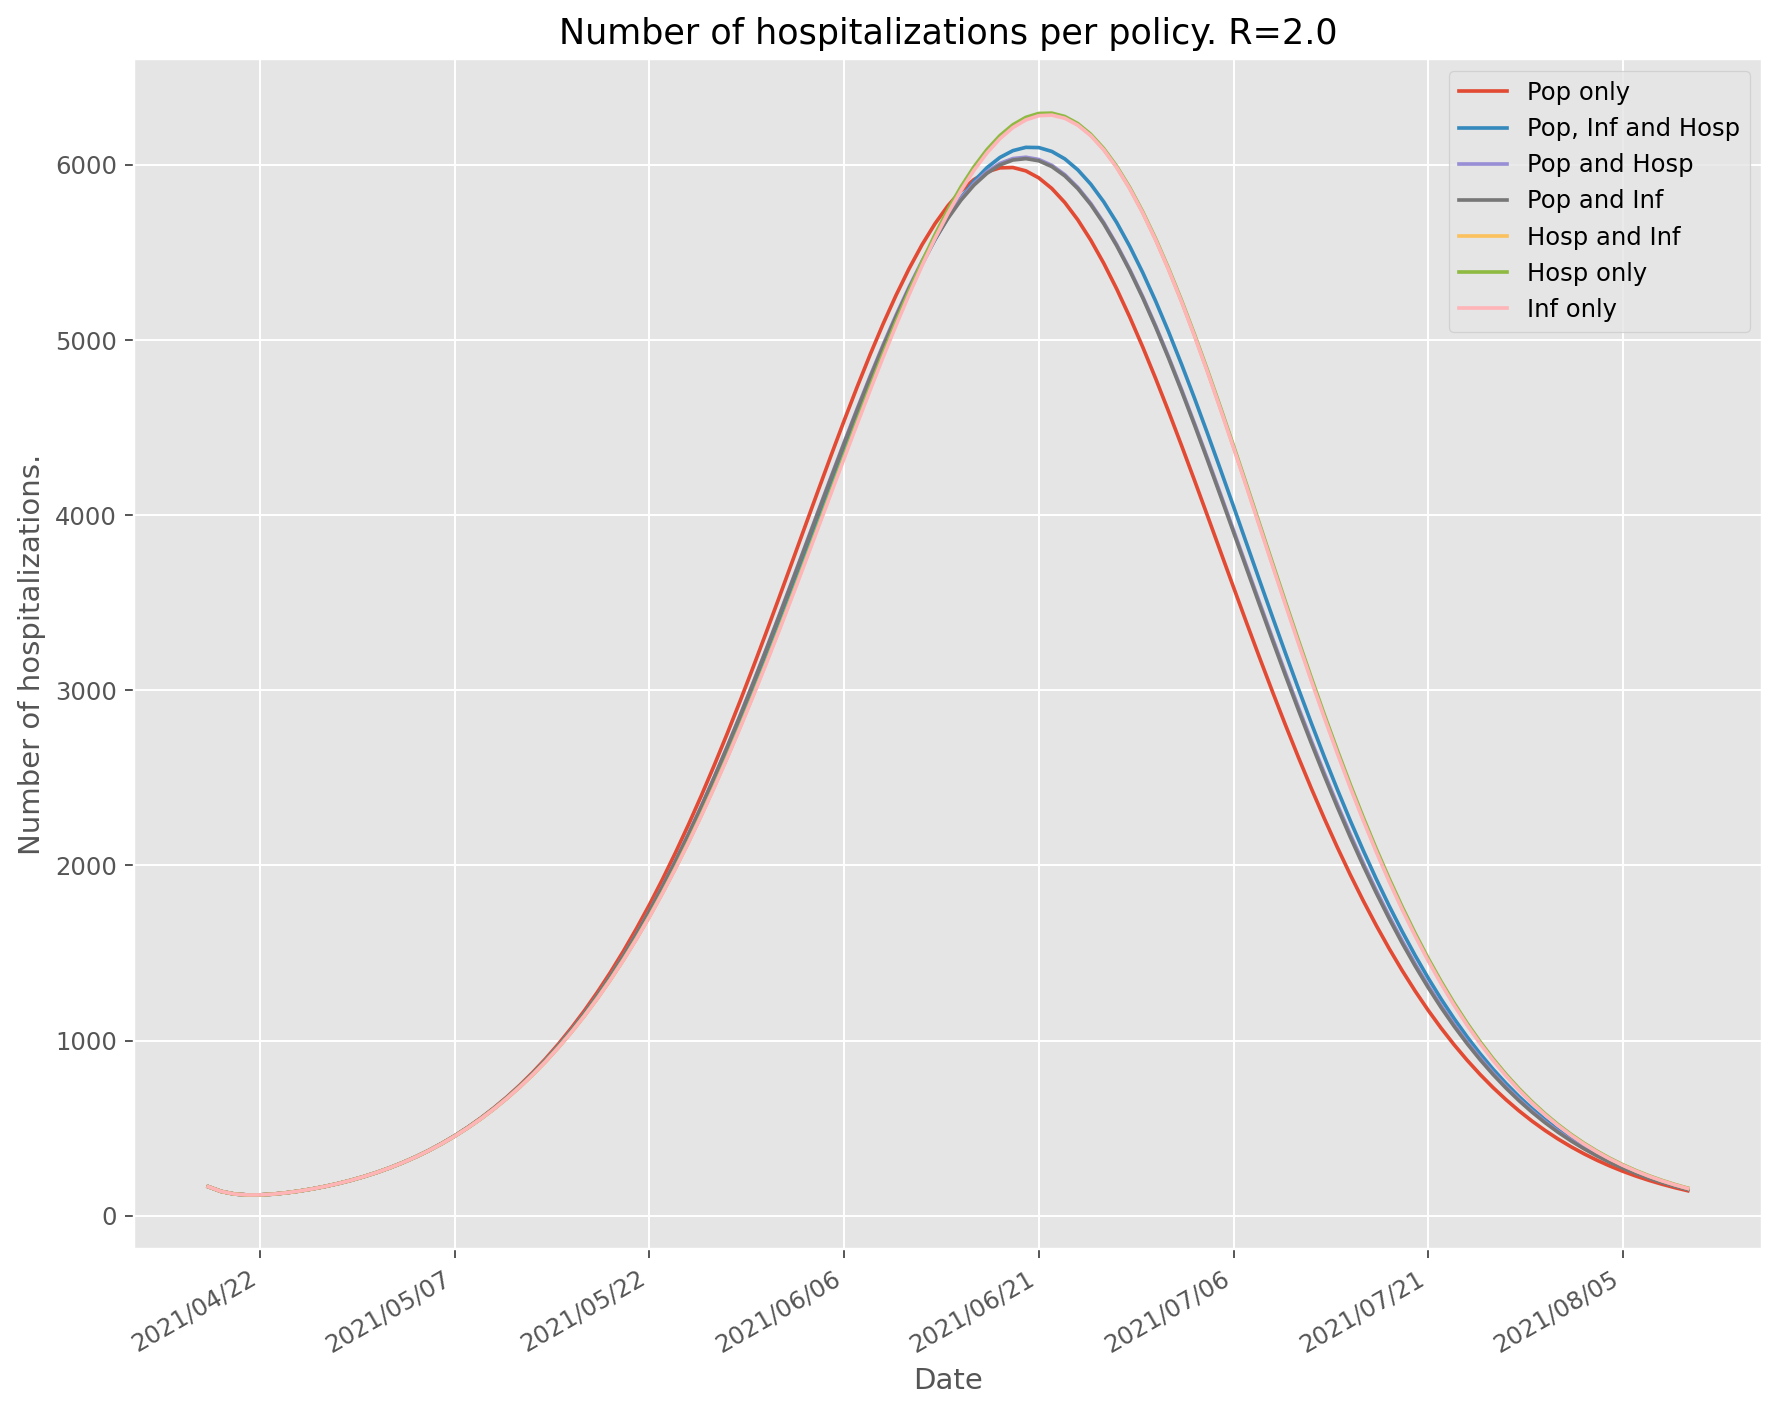

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# New Hospitalizations

Inf only: 1388.5514040526793
Hosp and Inf: 1390.3462873014855
Hosp only: 1392.530111775052
Pop, Inf and Hosp: 1396.2247825055063
Pop and Inf: 1401.163760659228
Pop and Hosp: 1402.8272119281585
Pop only: 1434.7511899744572


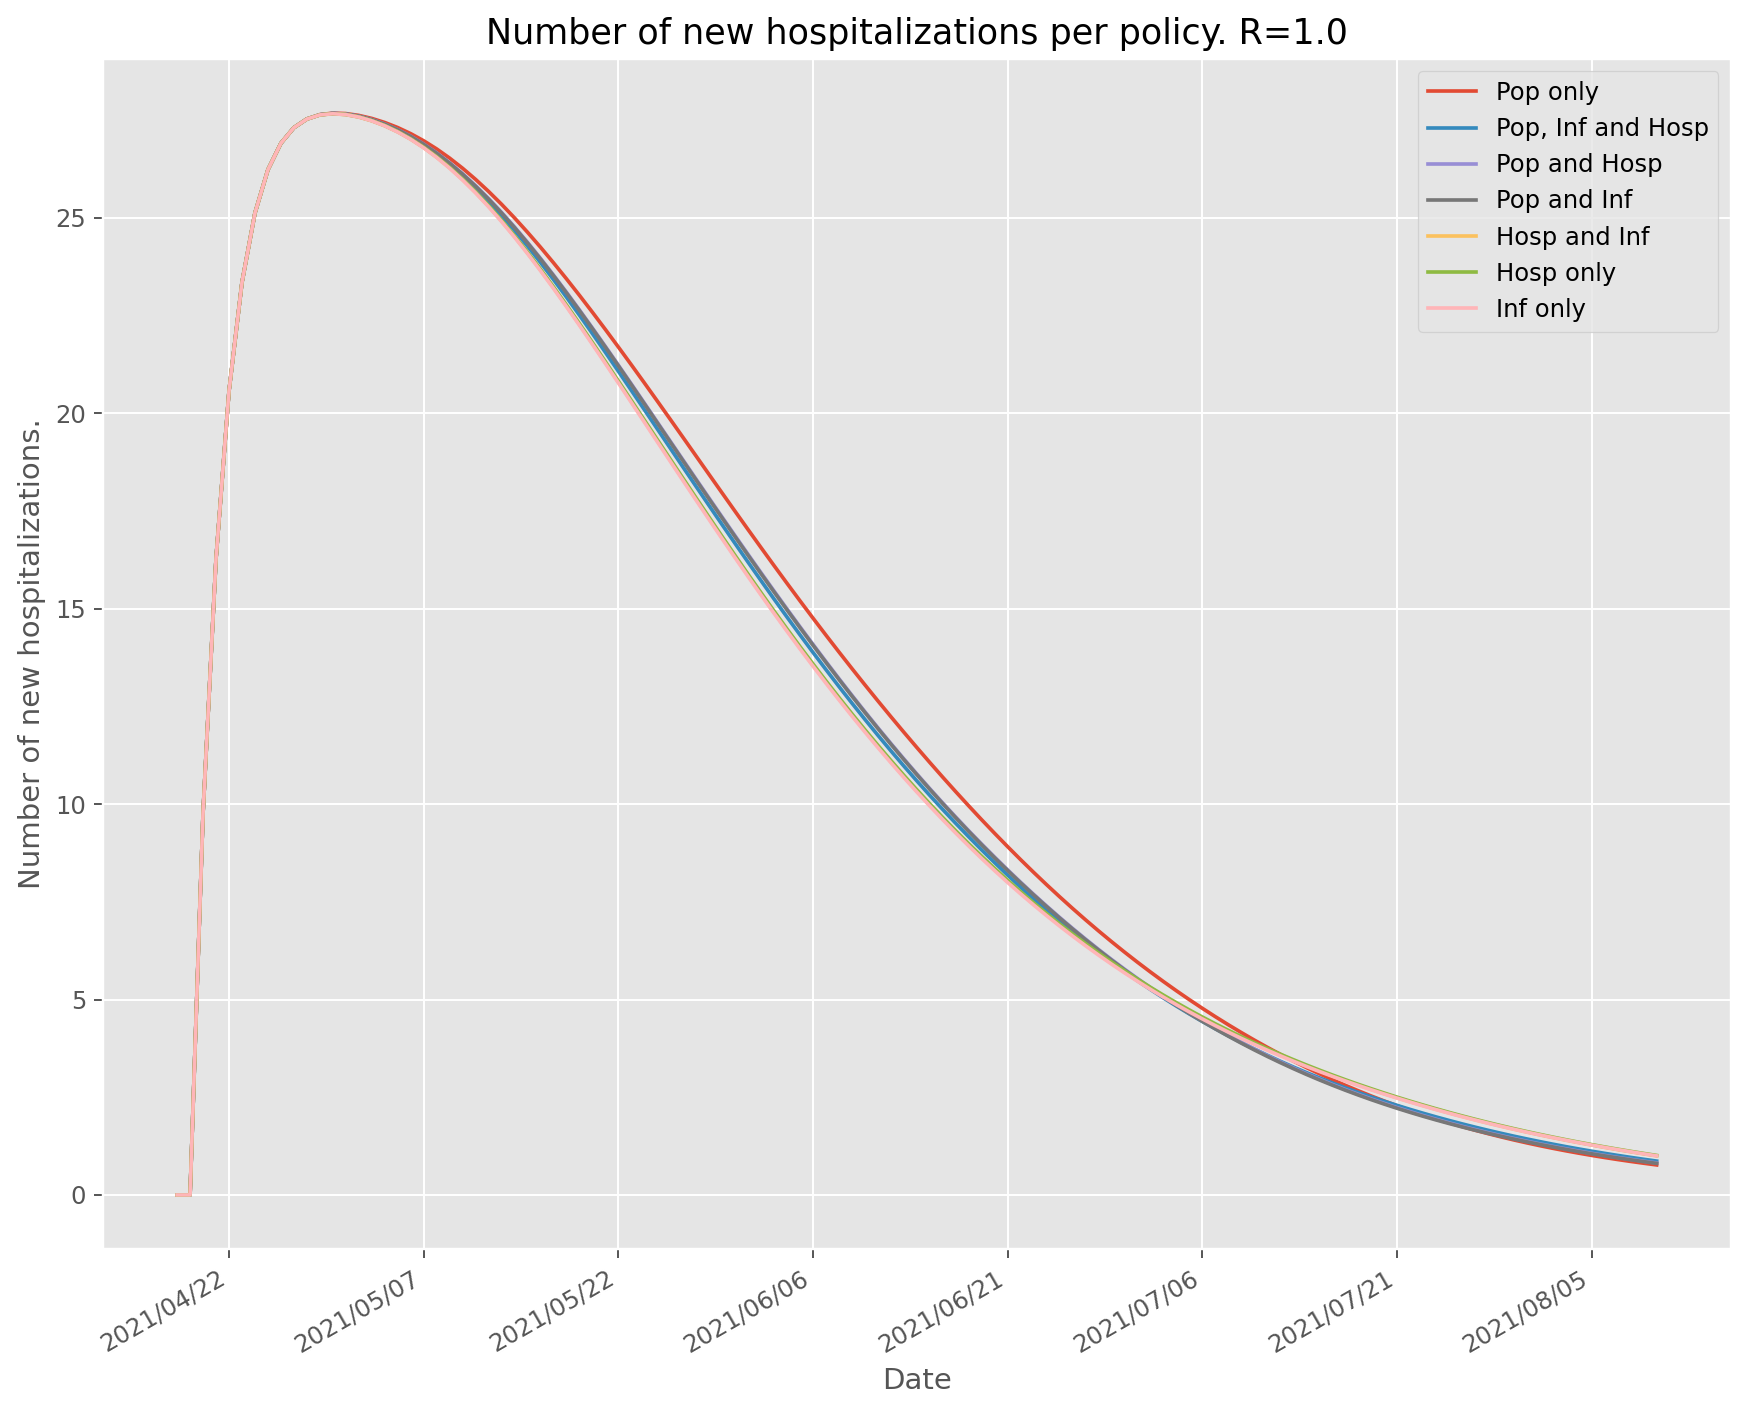

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 4488.4136828629535
Pop and Hosp: 4501.990389235645
Pop, Inf and Hosp: 4508.95462422927
Inf only: 4572.18049235054
Hosp and Inf: 4581.064383044036
Hosp only: 4594.749743620004
Pop only: 4595.240542083126


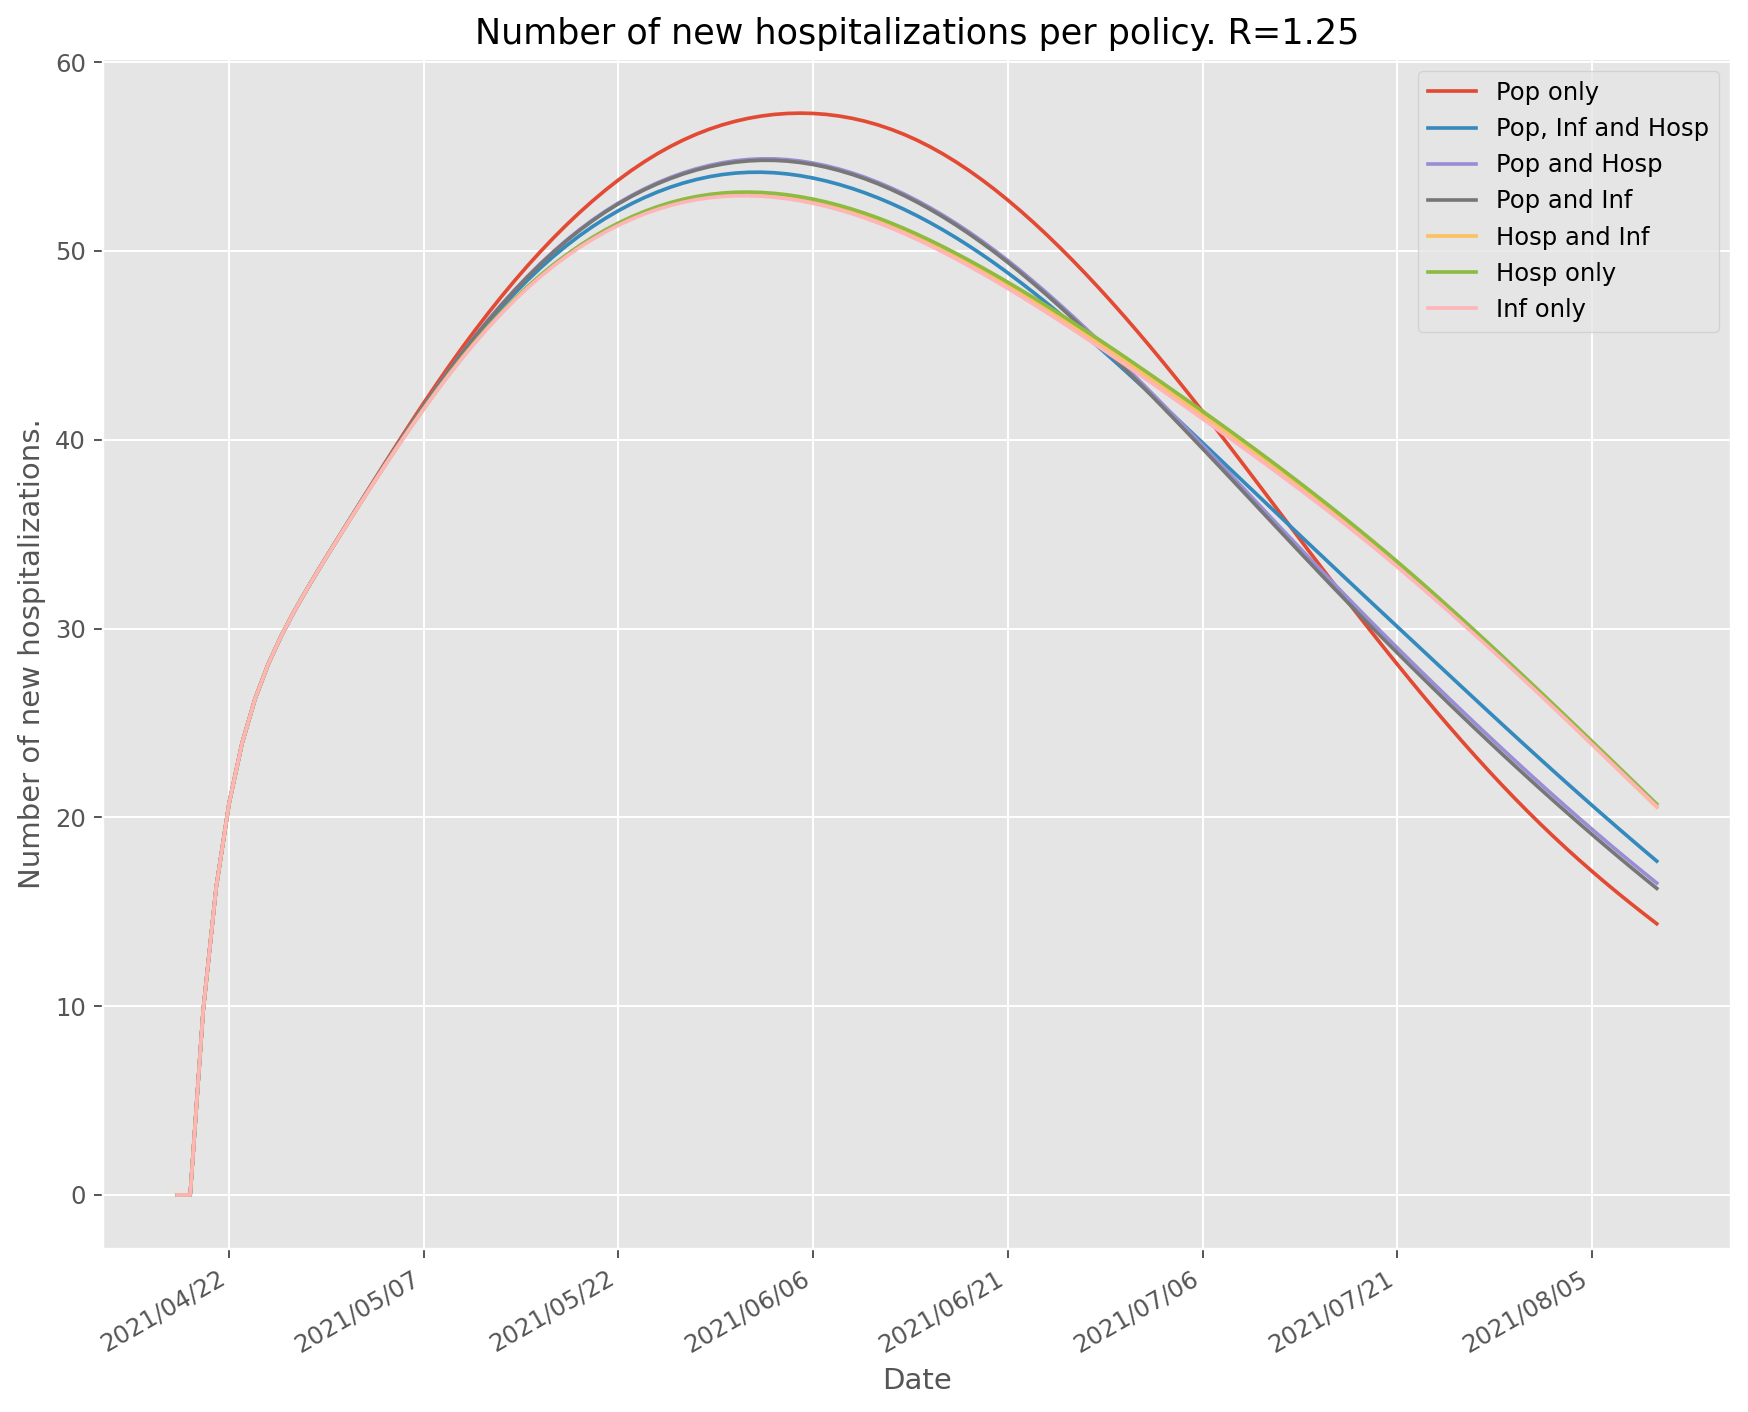

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 15408.784066339167
Pop and Inf: 15544.467139405959
Pop and Hosp: 15609.961635735644
Pop, Inf and Hosp: 15810.844060414876
Inf only: 16414.84742408689
Hosp and Inf: 16435.874929183086
Hosp only: 16484.068161620653


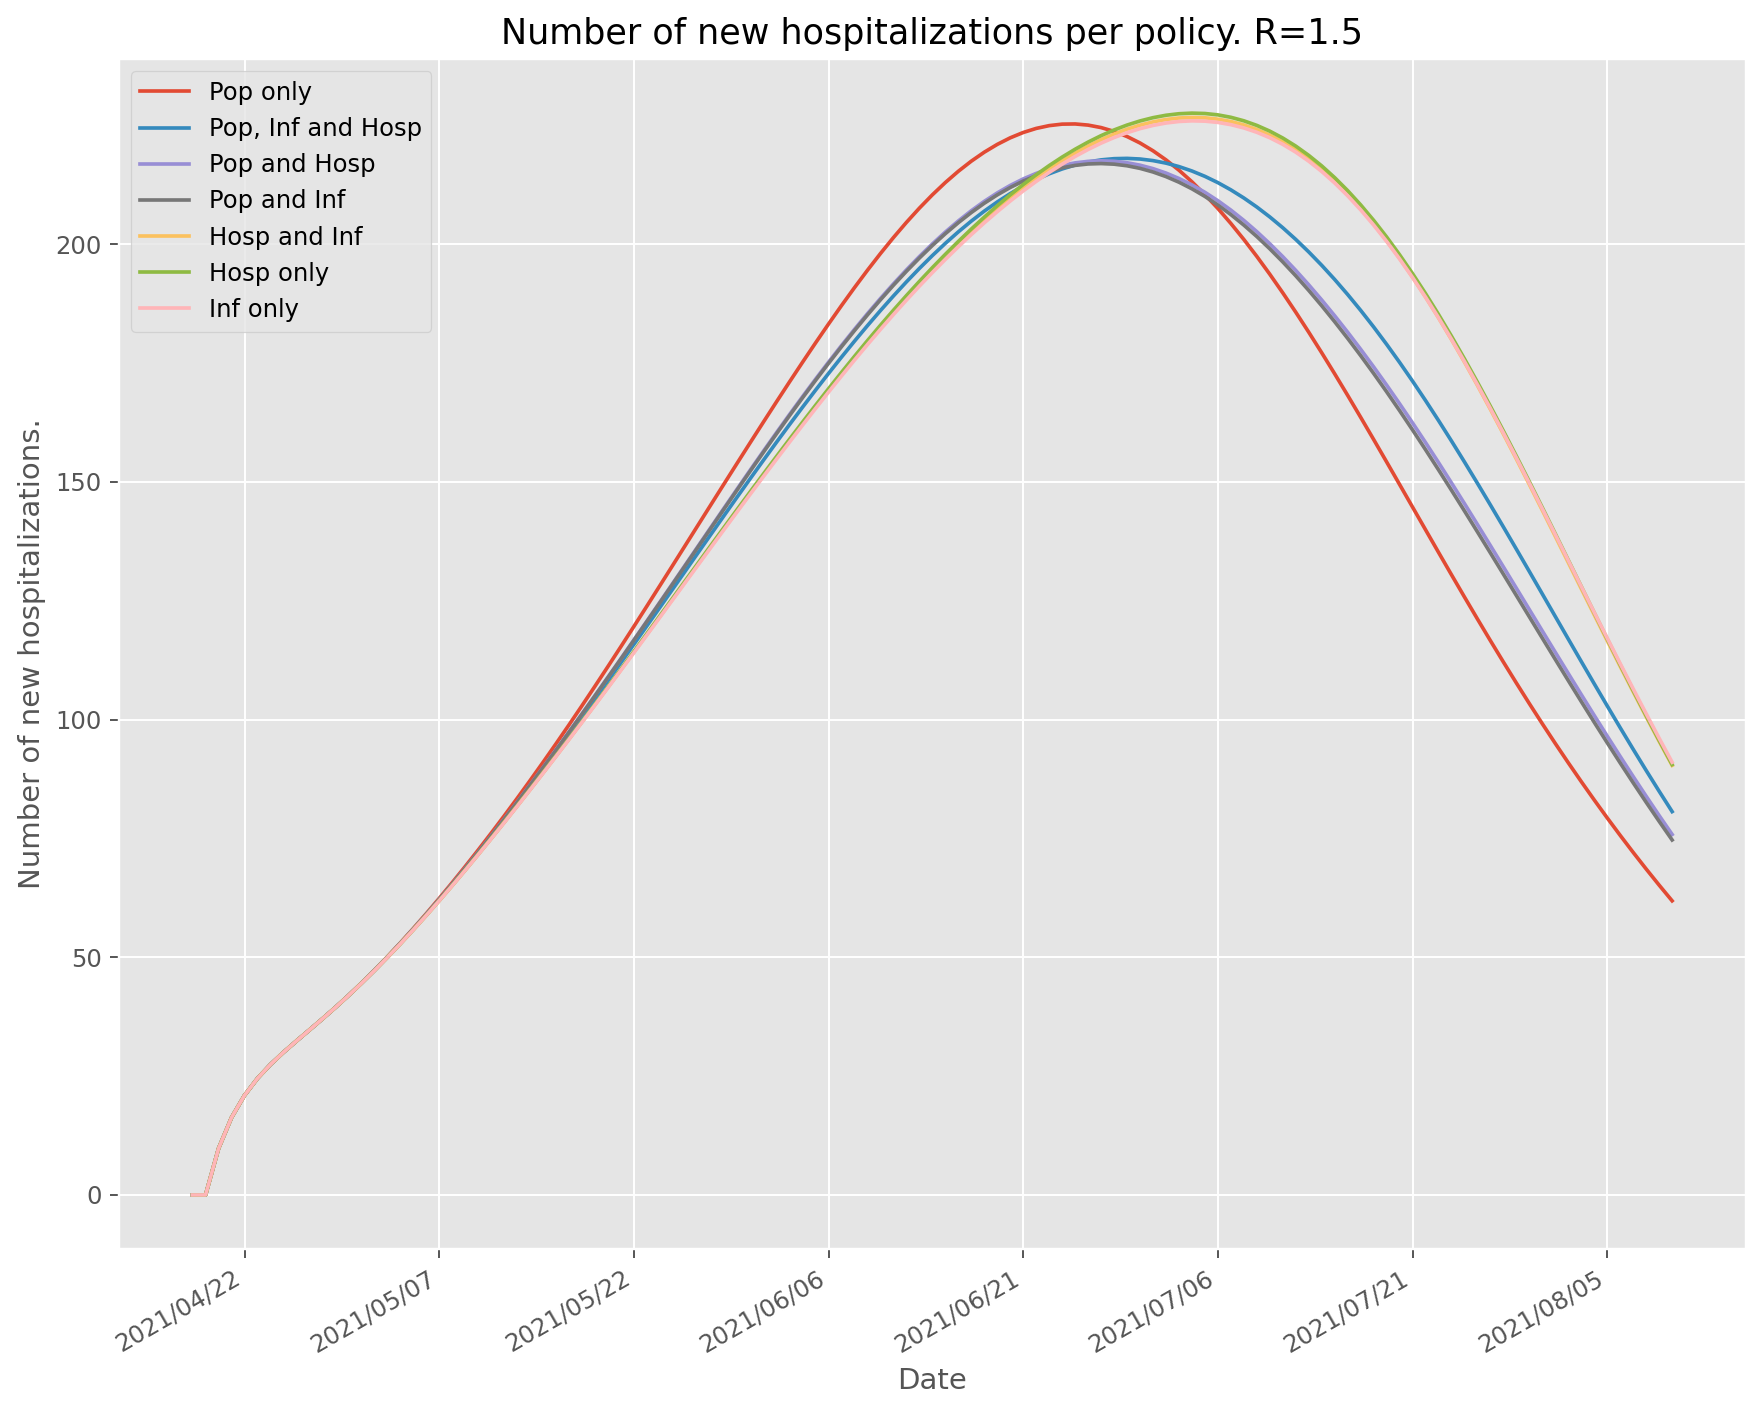

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 52353.273251354054
Pop and Inf: 53489.80359748396
Pop and Hosp: 53615.44208351052
Pop, Inf and Hosp: 54200.285715036516
Inf only: 55767.5977814929
Hosp and Inf: 55844.59391374675
Hosp only: 55956.7373825415


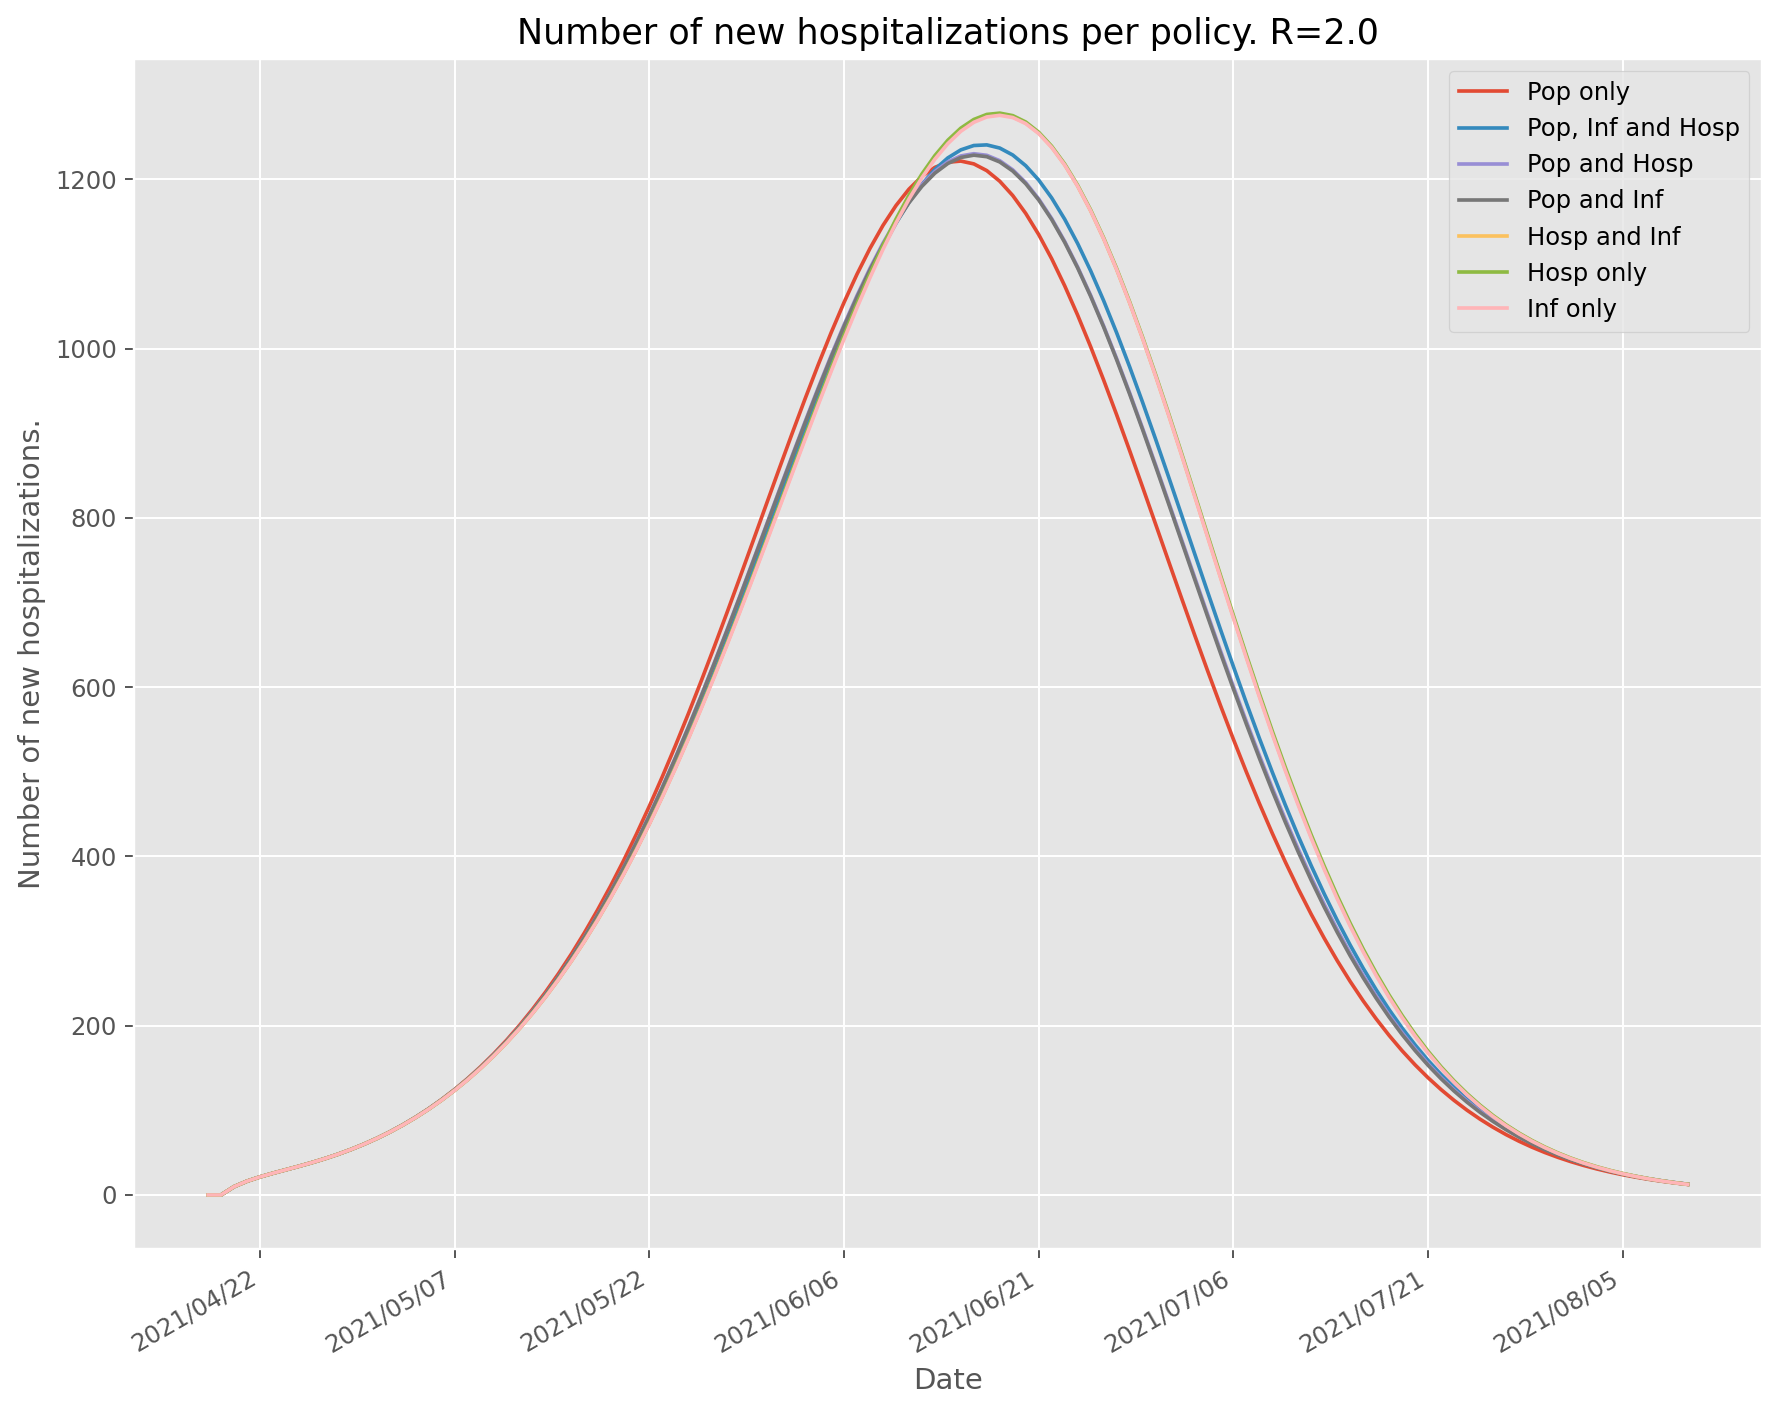

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 202504.09826143735
Hosp and Inf: 202708.21556162767
Hosp only: 202904.33695510222
Pop, Inf and Hosp: 205018.13181316134
Pop and Inf: 206212.49045133186
Pop and Hosp: 206333.39396723008
Pop only: 211075.13440920805


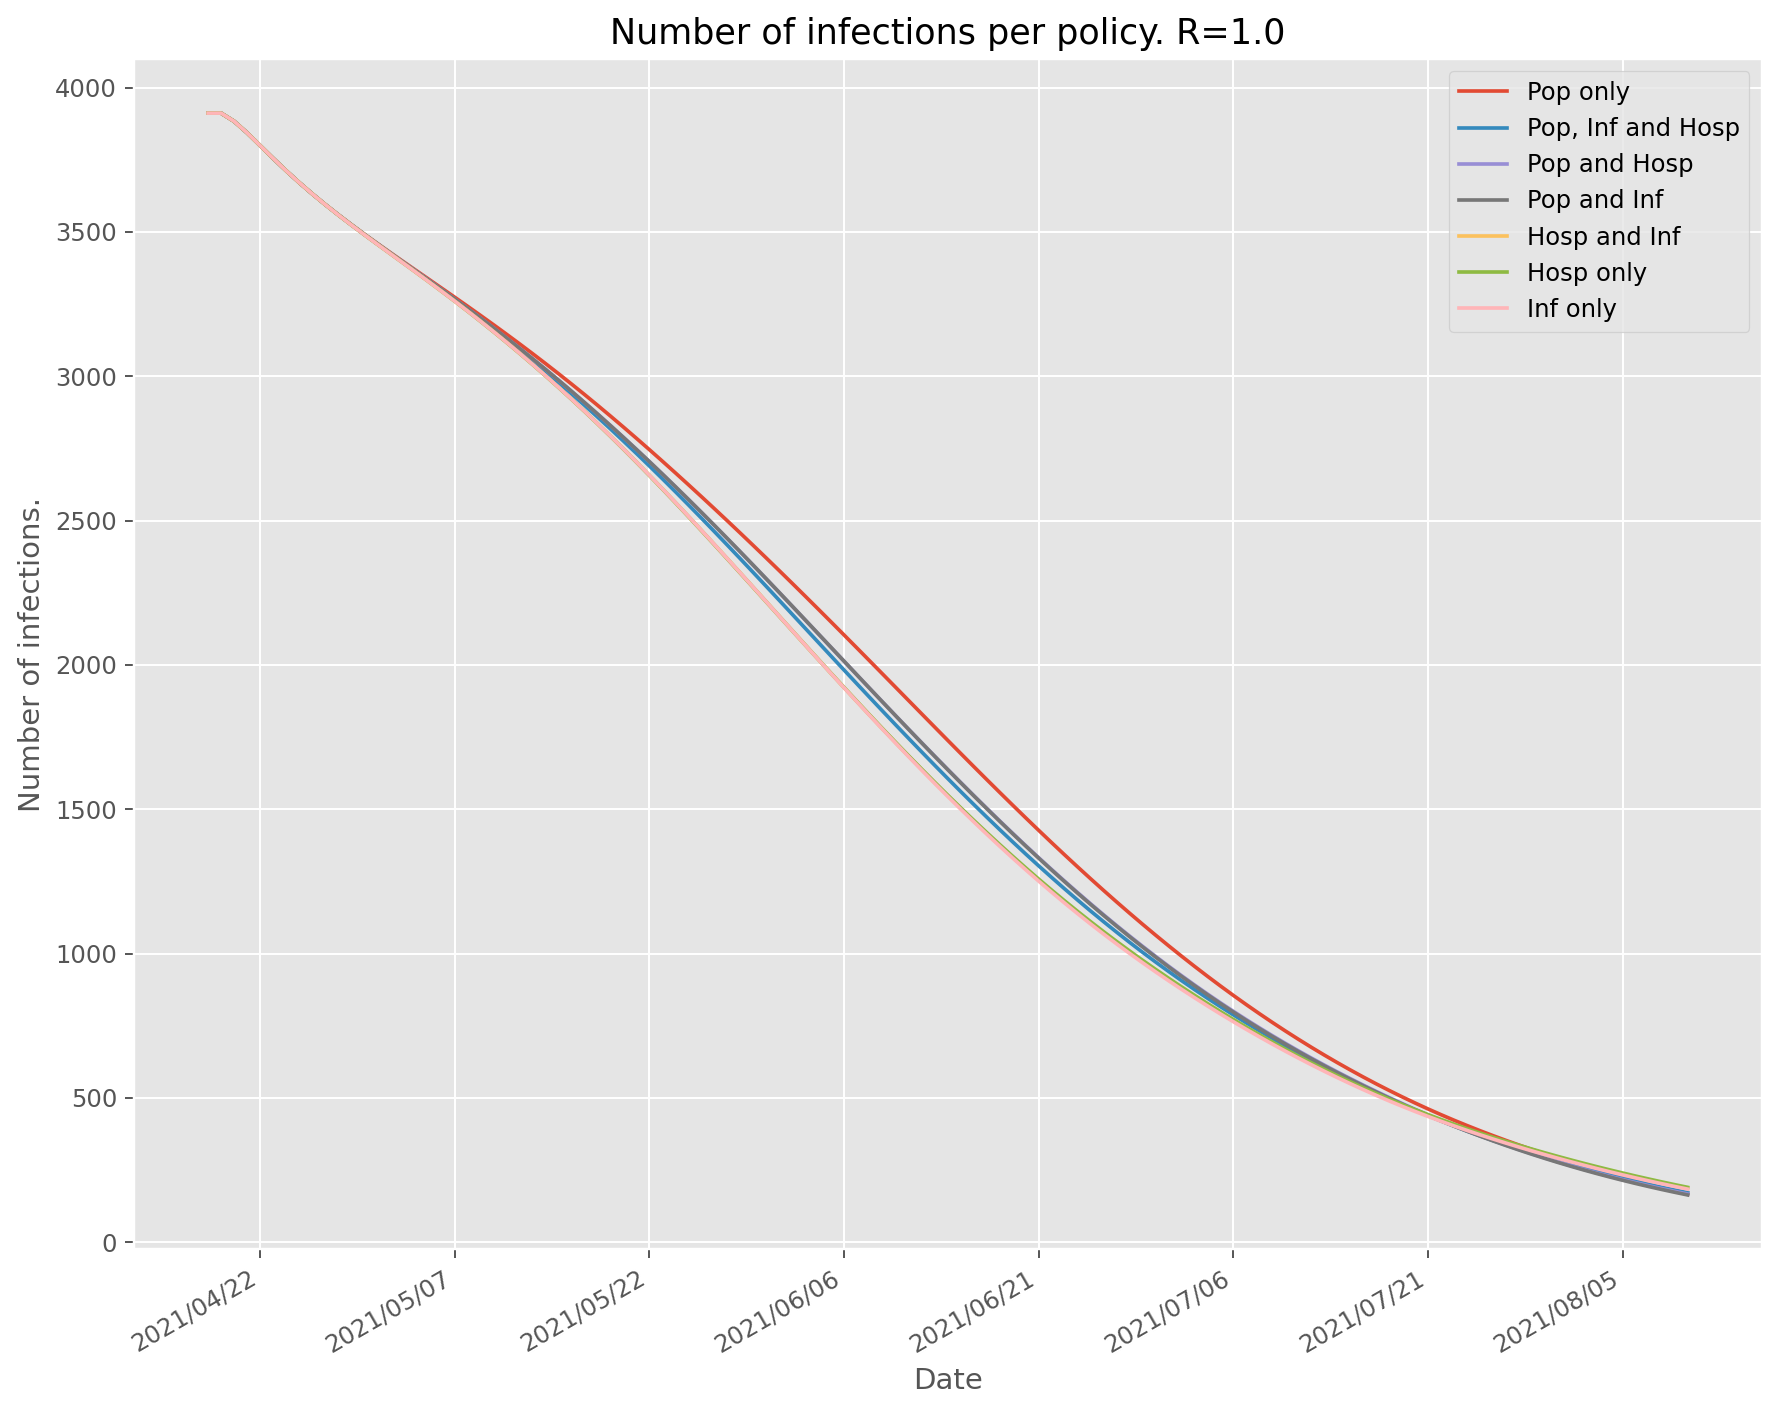

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 769849.3074724023
Hosp and Inf: 772127.3087040391
Hosp only: 774528.274552861
Pop, Inf and Hosp: 775910.2657911475
Pop and Inf: 777570.1378640279
Pop and Hosp: 779411.9044725031
Pop only: 798813.0180490953


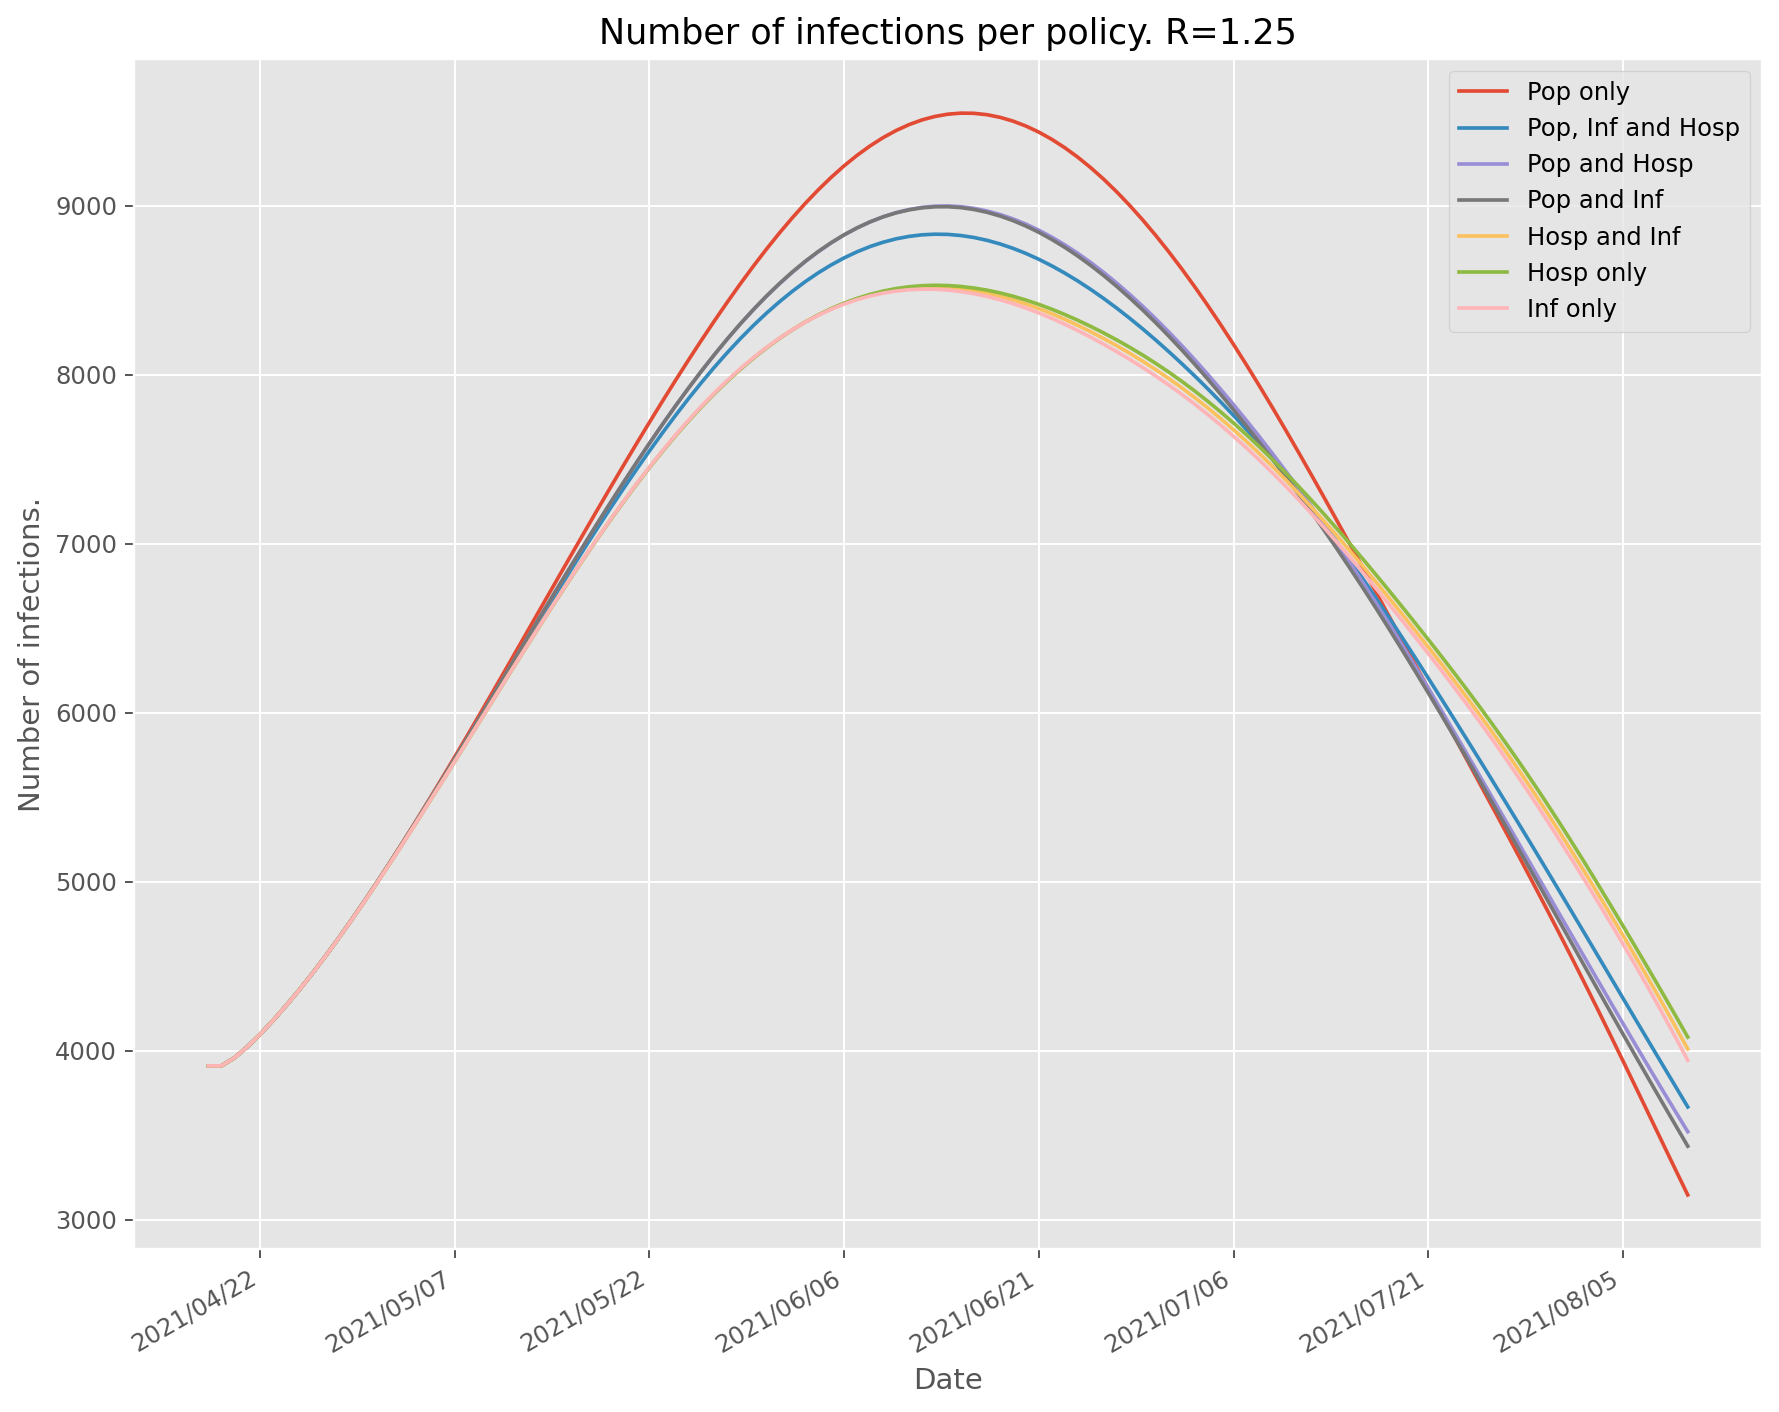

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 2759160.918526942
Pop only: 2762862.6165183564
Pop and Hosp: 2767688.064381334
Pop, Inf and Hosp: 2772739.7896910897
Inf only: 2779871.866737703
Hosp and Inf: 2787016.929457057
Hosp only: 2795207.5100504486


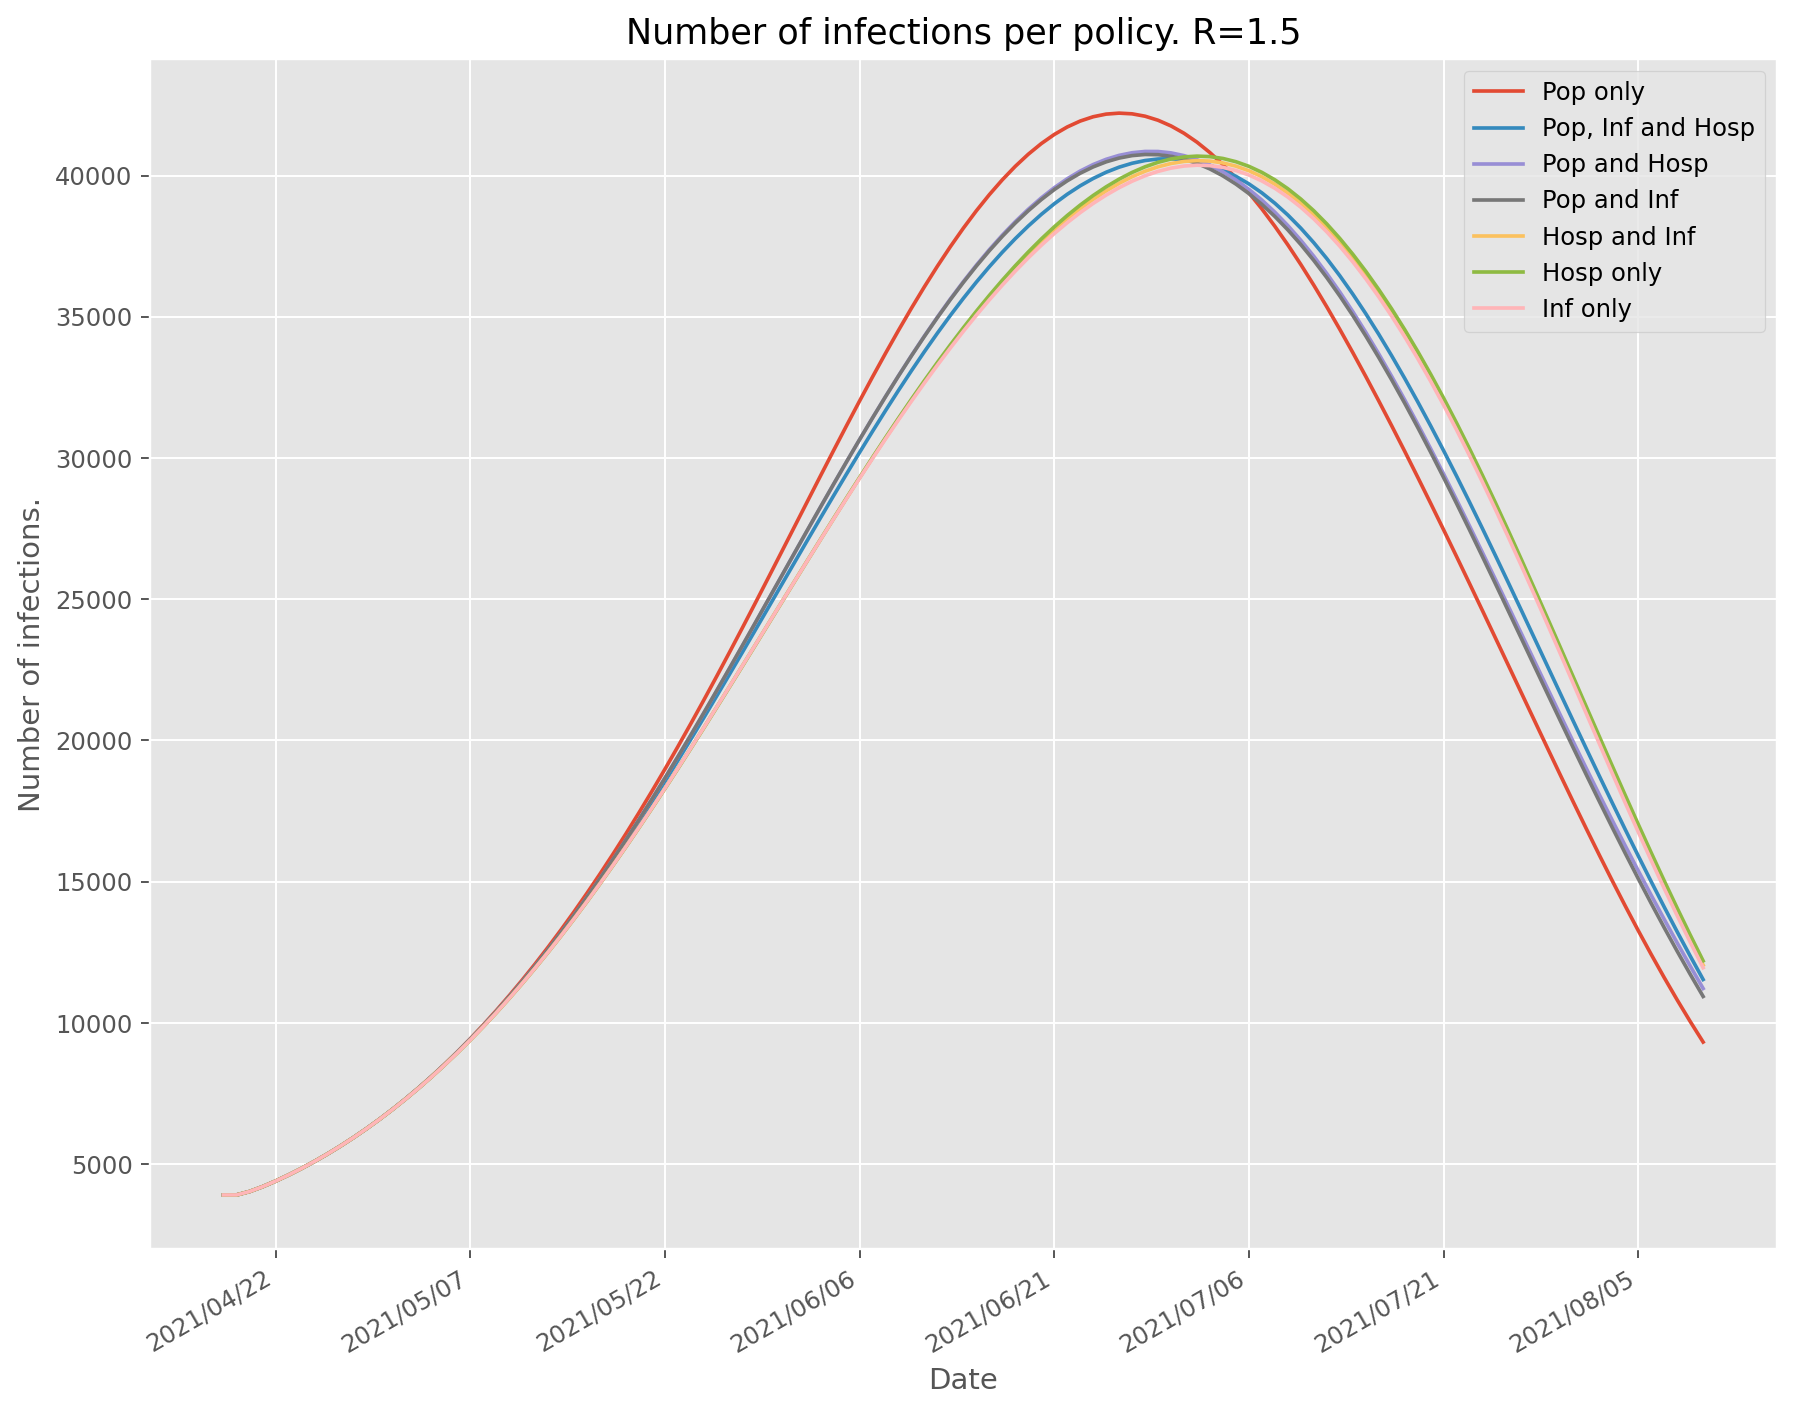

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 7661726.875507826
Pop and Inf: 7691321.832110516
Inf only: 7691888.775713653
Pop and Hosp: 7700231.749178133
Hosp and Inf: 7700700.851582992
Pop, Inf and Hosp: 7701697.52630917
Hosp only: 7708578.874479902


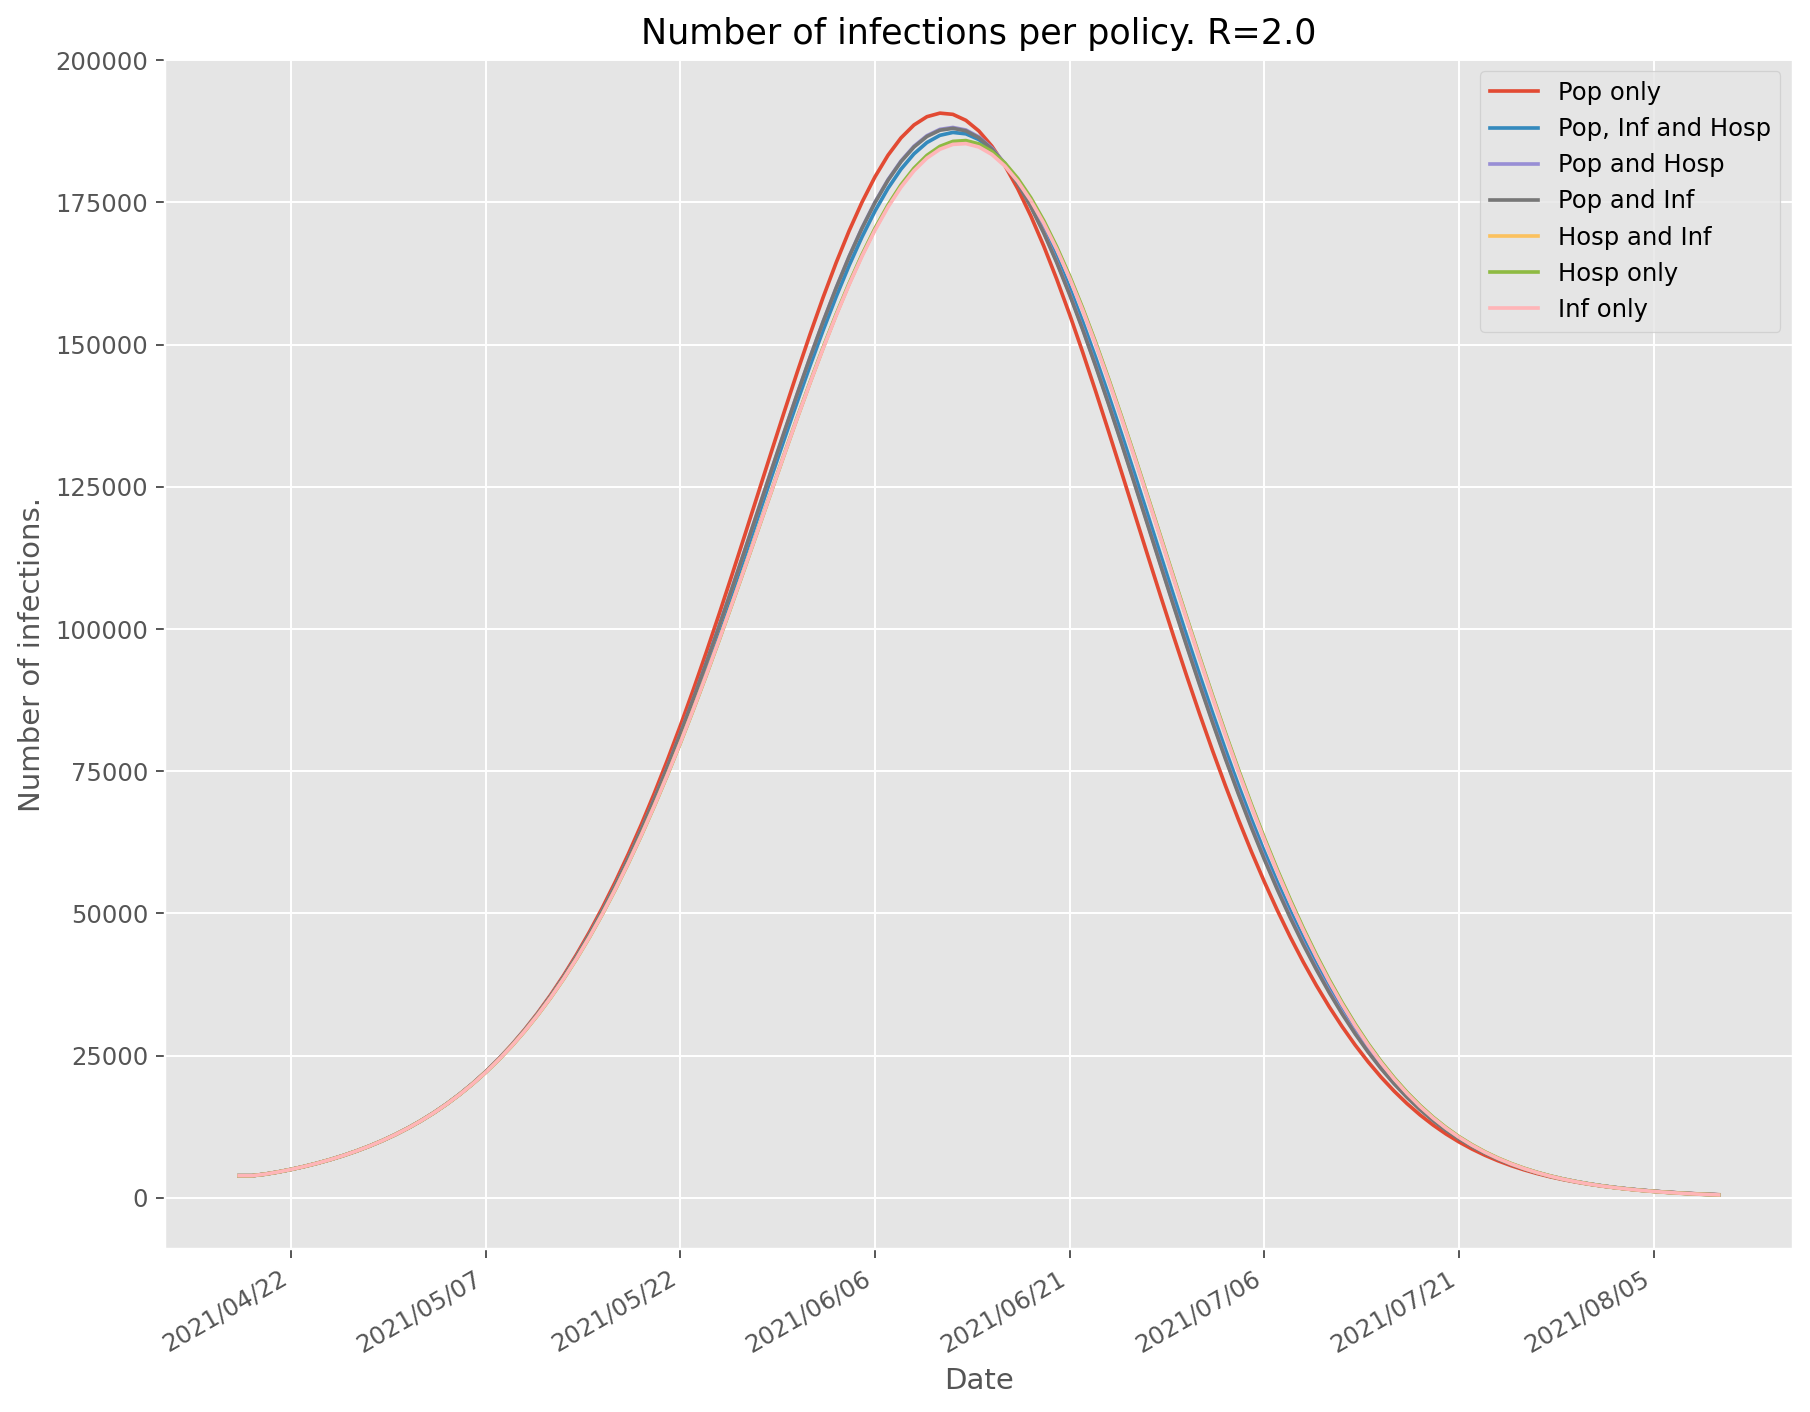

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()